created by Nurkahfi Amran Rahmada

# OVERVIEW

This script is my medium to complete the final task of data scientist project based internship program hosted by Rakamin x ID/X Partners. The dataset contains customer loan data from financial company.


## GOALS

* Create a machine learning to be able to predict credit risk
* Identifies factors that influence bad loans
* Made a business recommendations from this analysis

## BUSINESS UNDERSTANDING

* Credit risk is the probability of a financial loss resulting from a borrower's failure to repay a loan.
* Credit risk refers to the risk that a lender may not receive the owed principal and interest, which results in an interruption of cash flows and increased costs for collection.
* Banks can set specific standards for lending, including requiring a certain credit score from borrowers.

# MACHINE LEARNING MODELING

## LOADING PACKAGES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from scipy.stats import ks_2samp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve

pd.set_option('display.max_columns', None)

## LOADING DATA

In [2]:
df = pd.read_csv('datasets/loan_data_2007_2014.csv', index_col = 0, low_memory=False)

## DATA UNDERSTANDING

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13  annu

From this we can know that the dataset contains 74 columns, with 22 categorical columns and 52 numerical columns. Also there are 17 columns that are inactive (100% null values)

In [4]:
df.sample()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
100494  6786556    8408657      12000        12000          12000.0   

              term  int_rate  installment grade sub_grade         emp_title  \
100494   36 months       8.9       381.04     A        A5  Poolmaster, Inc.   

       emp_length home_ownership  annual_inc verification_status issue_d  \
100494    8 years       MORTGAGE    100000.0     Source Verified  Aug-13   

       loan_status pymnt_plan  \
100494     Current          n   

                                                      url desc  \
100494  https://www.lendingclub.com/browse/loanDetail....  NaN   

                   purpose       title zip_code addr_state    dti  \
100494  debt_consolidation  Debtconsol    959xx         CA  16.18   

        delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
100494          0.0           Jun-85             0.0                     NaN   

        mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
100494                     NaN      12.0      0.0      19892        50.1   

        total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
100494       21.0                   w    2948.99        2948.99     10669.12   

        total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
100494         10669.12          9051.01        1618.11                 0.0   

        recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
100494         0.0                      0.0       Dec-15           381.04   

       next_pymnt_d last_credit_pull_d  collections_12_mths_ex_med  \
100494       Jan-16             Jan-16                         0.0   

        mths_since_last_major_derog  policy_code application_type  \
100494                          NaN            1       INDIVIDUAL   

        annual_inc_joint  dti_joint  verification_status_joint  \
100494               NaN        NaN                        NaN   

        acc_now_delinq  tot_coll_amt  tot_cur_bal  open_acc_6m  open_il_6m  \
100494             0.0           0.0     247073.0          NaN         NaN   

        open_il_12m  open_il_24m  mths_since_rcnt_il  total_bal_il  il_util  \
100494          NaN          NaN                 NaN           NaN      NaN   

        open_rv_12m  open_rv_24m  max_bal_bc  all_util  total_rev_hi_lim  \
100494          NaN          NaN         NaN       NaN           39700.0   

        inq_fi  total_cu_tl  inq_last_12m  
100494     NaN          NaN           NaN

From the data sample, we know that there are 3 columns with unique values (`id`, `member_id`, `zip_code`), 2 columns containing text (`desc`, `url`), and unnecessary columns (`addr_state`).

In [5]:
df.shape

(466285, 74)

The dataset has 466,285 rows. Let's check if there is any duplicated rows or not.

In [6]:
df.duplicated().sum()

0

Turns out there is no duplicated rows in this dataset.

## DATA QUALITY CHECKS

### DATA CLEANSING

Through the data undestanding step, we knew that there are 17 inactive columns, 3 unique value columns, 2 text columns, and 1 unnecessary column, so we are going to remove that.

In [7]:
to_drop = [
    # UNIQUE ID
    'id',
    'member_id',
    'zip_code',

    # TEXT
    'url',
    'desc',
    
    # UNNECESSARY
    'addr_state',            

    # NULL COLUMNS
    'all_util',
    'inq_fi',
    'total_cu_tl',
    'inq_last_12m',
    'il_util',
    'open_rv_12m',
    'open_rv_24m',
    'max_bal_bc',
    'open_il_12m',
    'open_il_24m',
    'mths_since_rcnt_il',
    'total_bal_il',
    'annual_inc_joint',
    'dti_joint',
    'verification_status_joint',
    'open_acc_6m',
    'open_il_6m'
]

df.drop(to_drop, axis=1, inplace=True)

### MISSING VALUES

In this step, we want to know how many columns have missing values and their percentage.

In [8]:
vars = []

for f in df.columns:
    missings = df[f].isnull().sum()
    if missings > 0:
        vars.append(f)
        percentage = missings / df.shape[0]

        print('Variable {} has {} records ({:.2%}) with missing values'.format(
            f, missings, percentage))

print('In total, there are {} variables with missing values'.format(len(vars)))

Variable emp_title has 27588 records (5.92%) with missing values
Variable emp_length has 21008 records (4.51%) with missing values
Variable annual_inc has 4 records (0.00%) with missing values
Variable title has 21 records (0.00%) with missing values
Variable delinq_2yrs has 29 records (0.01%) with missing values
Variable earliest_cr_line has 29 records (0.01%) with missing values
Variable inq_last_6mths has 29 records (0.01%) with missing values
Variable mths_since_last_delinq has 250351 records (53.69%) with missing values
Variable mths_since_last_record has 403647 records (86.57%) with missing values
Variable open_acc has 29 records (0.01%) with missing values
Variable pub_rec has 29 records (0.01%) with missing values
Variable revol_util has 340 records (0.07%) with missing values
Variable total_acc has 29 records (0.01%) with missing values
Variable last_pymnt_d has 376 records (0.08%) with missing values
Variable next_pymnt_d has 227214 records (48.73%) with missing values
Variab

Turns out there are 3 columns with missing values higher than 50% (`mths_since_last_delinq`, `mths_since_last_record`, `mths_since_last_major_derog`), we want to get rid of that. We also want to handle all missing values from numerical columns by filling them with the average value of the column. As for categorical column, we're going to leave it alone for now.

In [9]:
# HANDLING COLUMNS WITH MISSING VALUES > 50%
to_drop = [
    'mths_since_last_delinq',
    'mths_since_last_record',
    'mths_since_last_major_derog'
]
df.drop(to_drop, axis=1)

# HANDLING MISSING VALUES IN NUMERICAL COLUMNS
mean_imp = SimpleImputer(strategy='mean')
for f in df.columns:
    if df[f].dtype in ['int64', 'float64']:
        df[f] = mean_imp.fit_transform(df[[f]]).ravel()

## EXPLORATORY DATA ANALYSIS

In [10]:
df.shape

(466285, 51)

Now we have 52 columns left for further processing. We want to split the categorical data and numerical data for later analysis.

In [11]:
categorical = df.select_dtypes(include='object').columns
numerical = df.select_dtypes(exclude='object').columns

print(len(categorical) , " " , len(numerical))

18   33


There are 18 categorical data and 33 numerical data for us to analysis. Let's look at the number of unique values from each data type.

In [12]:
df[categorical].nunique()

term                        2
grade                       7
sub_grade                  35
emp_title              205475
emp_length                 11
home_ownership              6
verification_status         3
issue_d                    91
loan_status                 9
pymnt_plan                  2
purpose                    14
title                   63098
earliest_cr_line          664
initial_list_status         2
last_pymnt_d               98
next_pymnt_d              100
last_credit_pull_d        103
application_type            1
dtype: int64

For categorical data, we have 2 columns that have way too many unique values (`emp_title`, `title`). We also have 1 columns that only have 1 unique values (`application_type`). We need to remove this later.

In [13]:
df[numerical].nunique()

loan_amnt                        1352
funded_amnt                      1354
funded_amnt_inv                  9854
int_rate                          506
installment                     55622
annual_inc                      31902
dti                              3997
delinq_2yrs                        25
inq_last_6mths                     29
mths_since_last_delinq            146
mths_since_last_record            124
open_acc                           63
pub_rec                            27
revol_bal                       58142
revol_util                       1270
total_acc                         113
out_prncp                      135665
out_prncp_inv                  141189
total_pymnt                    351609
total_pymnt_inv                347659
total_rec_prncp                172713
total_rec_int                  270249
total_rec_late_fee               5808
recoveries                      22773
collection_recovery_fee         20275
last_pymnt_amnt                198194
collections_

As for numerical data, having many unique values is not a problem, rather we want the values to have many unique values. But there is a column that only have 1 unique values (`policy_code`), we also need to remove this later.

In [14]:
to_drop = [
    'emp_title',
    'title',
    'application_type',
    'policy_code',
]
df.drop(to_drop, axis=1, inplace=True)

categorical = [col for col in categorical if col not in to_drop]
numerical = [col for col in numerical if col not in to_drop]

After we remove the columns, we need to update each categorical and numerical data list. Next we want to analysis the categorical data first.

### CATEGORICAL DATA

First, we want to check categorical data list with 14 or less unique values.

In [15]:
temp = []

for col in categorical:
    if df[col].nunique() <= 14:
        temp.append(col)
        
len(temp)

9

We will analysing 9 columns with bar chart to see if there is a data imbalance or not.

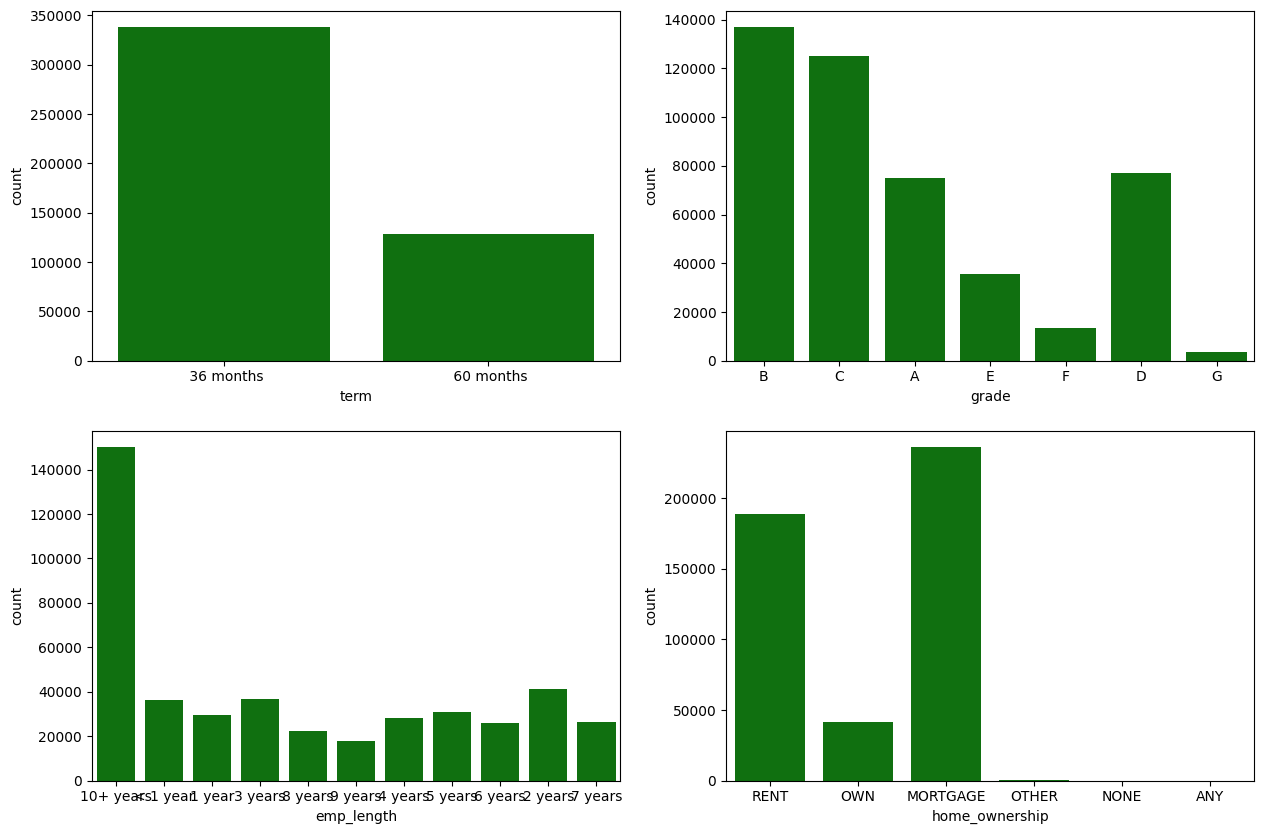

In [16]:
fig = plt.figure(figsize=(15, 10))

columns = 2
rows = 2

for i in range(4):
    fig.add_subplot(rows, columns, i+1)
    sns.countplot(data=df, x=temp[i], color='g')

plt.show()

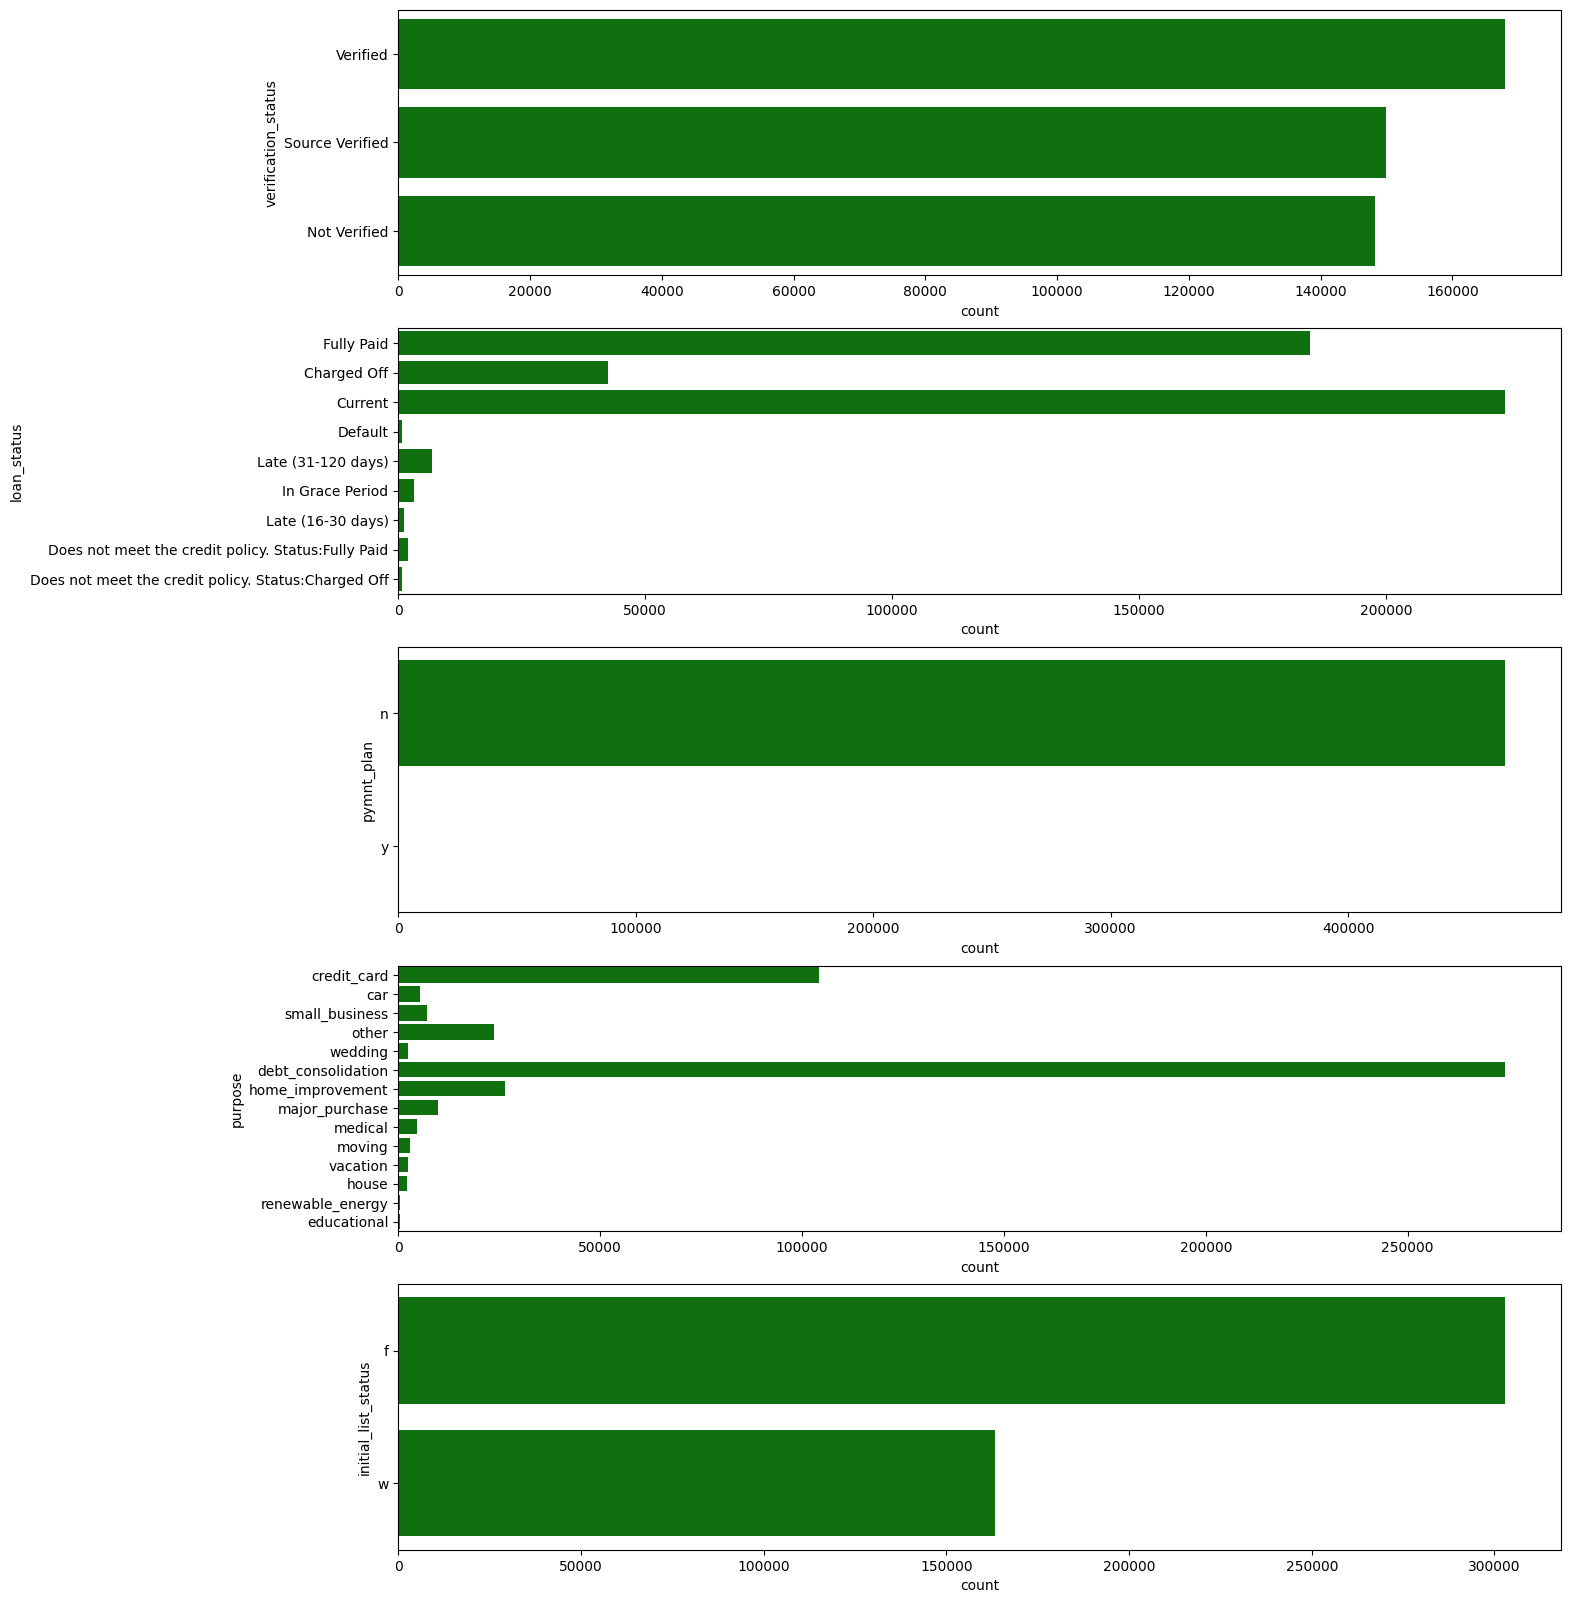

In [17]:
fig = plt.figure(figsize=(15, 20))

columns = 1
rows = 5

for i in range(5):
    fig.add_subplot(rows, columns, i+1)
    sns.countplot(data=df, y=temp[i+4], color='g')
        
plt.show()

`pymnt_plan` is imbalanced class with 99.9 : 0.1 ratio. We should remove that.

In [18]:
to_drop = ['pymnt_plan']

df.drop(to_drop, axis=1, inplace=True)

categorical = [col for col in categorical if col not in to_drop]

Next, we want to see each categorical data unique values.

In [19]:
for col in categorical:
    print(col)
    print(df[col].unique())
    print()

term
[' 36 months' ' 60 months']

grade
['B' 'C' 'A' 'E' 'F' 'D' 'G']

sub_grade
['B2' 'C4' 'C5' 'C1' 'B5' 'A4' 'E1' 'F2' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F4' 'F1' 'E5'
 'G4' 'E2' 'G3' 'G2' 'G1' 'F5' 'G5']

emp_length
['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]

home_ownership
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']

verification_status
['Verified' 'Source Verified' 'Not Verified']

issue_d
['Dec-11' 'Nov-11' 'Oct-11' 'Sep-11' 'Aug-11' 'Jul-11' 'Jun-11' 'May-11'
 'Apr-11' 'Mar-11' 'Feb-11' 'Jan-11' 'Dec-10' 'Nov-10' 'Oct-10' 'Sep-10'
 'Aug-10' 'Jul-10' 'Jun-10' 'May-10' 'Apr-10' 'Mar-10' 'Feb-10' 'Jan-10'
 'Dec-09' 'Nov-09' 'Oct-09' 'Sep-09' 'Aug-09' 'Jul-09' 'Jun-09' 'May-09'
 'Apr-09' 'Mar-09' 'Feb-09' 'Jan-09' 'Dec-08' 'Nov-08' 'Oct-08' 'Sep-08'
 'Aug-08' 'Jul-08' 'Jun-08' 'May-08' 'Apr-08' 'Mar-08' 'Feb-08' 'Jan-08'
 'Dec-07' 'Nov-07' 'Oct-07' 'Sep

There are 5 columns containing dates, we will change the format to a regular date format using pandas.

In [20]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format = '%b-%y')
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%y')
df['next_pymnt_d'] = pd.to_datetime(df['next_pymnt_d'], format='%b-%y')
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format = '%b-%y')

Then we want to make 2 new features. One labeled as `pymnt_time`, this is the distance in months from the `last_pymnt_d` to the `next_pymnt_d`. The other labeled as `credit_duration`, this is the number of year between `last_credit_pull_d` and `earliest_cr_line`.

In [21]:
df['pymnt_time'] = (df['next_pymnt_d'] - df['last_pymnt_d']).dt.days // 30
df['credit_duration'] = (df['last_credit_pull_d'] - df['earliest_cr_line']).dt.days // 365

In [22]:
print(len(df[df['credit_duration'] < 0]) , len(df[df['pymnt_time'] < 0]))

1168 0


There seems to be an error when converting the date to regular date format and it produces negative values when subtracting the years. 

In [23]:
df['last_credit_pull_d'].unique()
df['earliest_cr_line'].unique()

<DatetimeArray>
['1985-01-01 00:00:00', '1999-04-01 00:00:00', '2001-11-01 00:00:00',
 '1996-02-01 00:00:00', '1996-01-01 00:00:00', '2004-11-01 00:00:00',
 '2005-07-01 00:00:00', '2007-01-01 00:00:00', '2004-04-01 00:00:00',
 '2004-09-01 00:00:00',
 ...
 '2054-01-01 00:00:00', '2057-01-01 00:00:00', '2044-01-01 00:00:00',
 '2050-10-01 00:00:00', '2048-01-01 00:00:00', '2061-07-01 00:00:00',
 '2058-05-01 00:00:00', '2053-01-01 00:00:00', '2050-05-01 00:00:00',
 '2056-11-01 00:00:00']
Length: 665, dtype: datetime64[ns]

The formatter misinterpret all years that are less than 1985 and resulting to convert them to 20xx. The data is too old to be converted, so we guess it doesn't matter if we change the negative values to 0 and assuming the data is not valid anymore.

In [24]:
print(df['pymnt_time'].isnull().sum() , ' ' , df['credit_duration'].isnull().sum())

227226   70


There are also missing values that need to be filled. We will fill all missing values with 0 for both classes.

In [25]:
df['pymnt_time'] = df['pymnt_time'].fillna(0)
df['credit_duration'] = df['credit_duration'].fillna(0)
df.loc[df['credit_duration'] < 0, 'credit_duration'] = 0

drop = [
    'earliest_cr_line',
    'last_credit_pull_d',
    'next_pymnt_d',
    'last_pymnt_d',
    'issue_d'
]
df.drop(drop, axis=1, inplace=True)

After we fill the missing values for both classes and handling the misformatted value, we dropped the class because it is unused anymore.

After that we will transform some categorical data to numerical data by removing the string. We will transform this classes : <br>
    1. `term` <br>
    2. `emp_length` <br>
    3. `grade` <br>
    4. `sub_grade`

In [26]:
df['term'] = df['term'].str.replace(' months', '')
df['term'] = df['term'].astype(float)

For `term`, because there are just 2 unique values ("36 months" and "60 months"), we just need to remove the string " months"

In [27]:
target_dict = {'< 1 year': 0,
               '1 year': 1,
               '2 years': 2,
               '3 years': 3,
               '4 years': 4,
               '5 years': 5,
               '6 years': 6,
               '7 years': 7,
               '8 years': 8,
               '9 years': 9,
               '10+ years': 10}

df["emp_length"] = df["emp_length"].map(target_dict)
df['emp_length'] = df['emp_length'].fillna(-1)

For `emp_length`, we convert all the values into their corresponding year and fill the missing values by -1.

In [28]:
target_dict = {'G': 0,
               'F': 1,
               'E': 2,
               'D': 3,
               'C': 4,
               'B': 5,
               'A': 6}

df["grade"] = df["grade"].map(target_dict)

For `grade`, we convert all values to sequential numbers.

In [29]:
def to_value(row):
    valid_starts = ('A', 'B', 'C', 'D', 'E', 'F', 'G')
    if row.startswith(valid_starts):
        val = int(row[1])
        return val if 1 <= val <= 5 else 0
    else:
        return 0
    
df['sub_grade'] = df["sub_grade"].apply(to_value)

For `sub_grade`, we also convert all values to sequential numbers by checking their valid grade.

After converting some categorical data to numerical data, we will encode all the remaining categorical data using one hot encoding. But first, there are some columns that need to be inspected.

In [30]:
target_dict = {
    'RENT': 'RENT',
    'MORTGAGE': 'MORTGAGE',
    'OWN': 'OWN',
    'OTHER': 'OTHER',
    'ANY': 'OTHER',
    'NONE': 'OTHER'
}

df["home_ownership"] = df["home_ownership"].map(target_dict)

For `target_dict`, we change "ANY" and "NONE" to "OTHER". This is done to reduce the results of One Hot Encoding

We will exclude `loan_status` from one hot encoding because it will be defined as our target variable later.

In [31]:
categorical = df.select_dtypes(include='object').columns

categorical = [col for col in categorical if col != 'loan_status']

onehot = pd.get_dummies(df[categorical])

onehot = onehot.astype(int)
onehot.head()

home_ownership_MORTGAGE  home_ownership_OTHER  home_ownership_OWN  \
0                        0                     0                   0   
1                        0                     0                   0   
2                        0                     0                   0   
3                        0                     0                   0   
4                        0                     0                   0   

   home_ownership_RENT  verification_status_Not Verified  \
0                    1                                 0   
1                    1                                 0   
2                    1                                 1   
3                    1                                 0   
4                    1                                 0   

   verification_status_Source Verified  verification_status_Verified  \
0                                    0                             1   
1                                    1                             0   
2                                    0                             0   
3                                    1                             0   
4                                    1                             0   

   purpose_car  purpose_credit_card  purpose_debt_consolidation  \
0            0                    1                           0   
1            1                    0                           0   
2            0                    0                           0   
3            0                    0                           0   
4            0                    0                           0   

   purpose_educational  purpose_home_improvement  purpose_house  \
0                    0                         0              0   
1                    0                         0              0   
2                    0                         0              0   
3                    0                         0              0   
4                    0                         0              0   

   purpose_major_purchase  purpose_medical  purpose_moving  purpose_other  \
0                       0                0               0              0   
1                       0                0               0              0   
2                       0                0               0              0   
3                       0                0               0              1   
4                       0                0               0              1   

   purpose_renewable_energy  purpose_small_business  purpose_vacation  \
0                         0                       0                 0   
1                         0                       0                 0   
2                         0                       1                 0   
3                         0                       0                 0   
4                         0                       0                 0   

   purpose_wedding  initial_list_status_f  initial_list_status_w  
0                0                      1                      0  
1                0                      1                      0  
2                0                      1                      0  
3                0                      1                      0  
4                0                      1                      0

This will be merged into our final dataframe later

In [32]:
df.sample(10)

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment  \
132342     6400.0       6400.0           6400.0  36.0     14.33       219.77   
156949    16000.0      16000.0          15975.0  36.0     13.11       539.96   
194386    12000.0      12000.0          12000.0  36.0     14.33       412.06   
260595    24000.0      24000.0          24000.0  60.0     15.59       578.42   
167525    35000.0      35000.0          35000.0  60.0     17.27       874.93   
194223     6000.0       6000.0           6000.0  36.0      7.90       187.75   
295143     7200.0       7200.0           7200.0  36.0     14.49       247.80   
25122      5000.0       5000.0           5000.0  36.0     15.21       173.85   
114807    24000.0      24000.0          24000.0  36.0     11.55       792.00   
303031    25000.0      25000.0          25000.0  60.0     22.15       692.61   

        grade  sub_grade  emp_length home_ownership  annual_inc  \
132342      4          1         9.0       MORTGAGE     26000.0   
156949      5          4         2.0       MORTGAGE     75000.0   
194386      4          1         4.0           RENT    410450.0   
260595      3          1         2.0            OWN     60000.0   
167525      4          5         8.0       MORTGAGE     84000.0   
194223      6          4         1.0            OWN     27000.0   
295143      4          4         0.0           RENT     60000.0   
25122       3          2        10.0           RENT     21000.0   
114807      5          3        10.0           RENT     75000.0   
303031      2          5         1.0           RENT     70000.0   

       verification_status  loan_status             purpose    dti  \
132342            Verified      Current    home_improvement  34.62   
156949        Not Verified   Fully Paid         credit_card  21.38   
194386     Source Verified   Fully Paid         credit_card   1.92   
260595        Not Verified      Current         credit_card   5.12   
167525            Verified  Charged Off  debt_consolidation  31.01   
194223        Not Verified   Fully Paid         credit_card  29.60   
295143     Source Verified      Current              moving  32.26   
25122         Not Verified   Fully Paid  debt_consolidation  15.60   
114807            Verified   Fully Paid  debt_consolidation  10.98   
303031     Source Verified      Current  debt_consolidation  20.91   

        delinq_2yrs  inq_last_6mths  mths_since_last_delinq  \
132342          0.0             1.0                34.10443   
156949          0.0             1.0                31.00000   
194386          0.0             2.0                34.10443   
260595          0.0             1.0                25.00000   
167525          0.0             0.0                50.00000   
194223          0.0             1.0                34.10443   
295143          0.0             0.0                34.10443   
25122           0.0             0.0                56.00000   
114807          0.0             0.0                37.00000   
303031          0.0             2.0                34.10443   

        mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
132342               74.306012       8.0      0.0     6452.0        62.0   
156949               74.306012      24.0      0.0     8912.0        54.0   
194386               74.306012       6.0      0.0     3404.0        66.7   
260595               74.306012       9.0      0.0    13039.0        30.3   
167525               74.306012      11.0      0.0    39911.0        93.9   
194223               74.306012       6.0      0.0     5895.0        34.7   
295143               74.306012      13.0      0.0    11514.0        53.3   
25122                74.306012       8.0      0.0     7155.0        81.3   
114807               74.306012      10.0      0.0    13393.0        48.0   
303031               74.306012       6.0      0.0    11631.0        43.9   

        total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
132342

This is our dataset so far after applying some preprocessing to categorical data.

### NUMERICAL DATA

Next step we will process the remaining numerical data. First, we will remove columns with high correlation (above 70%)

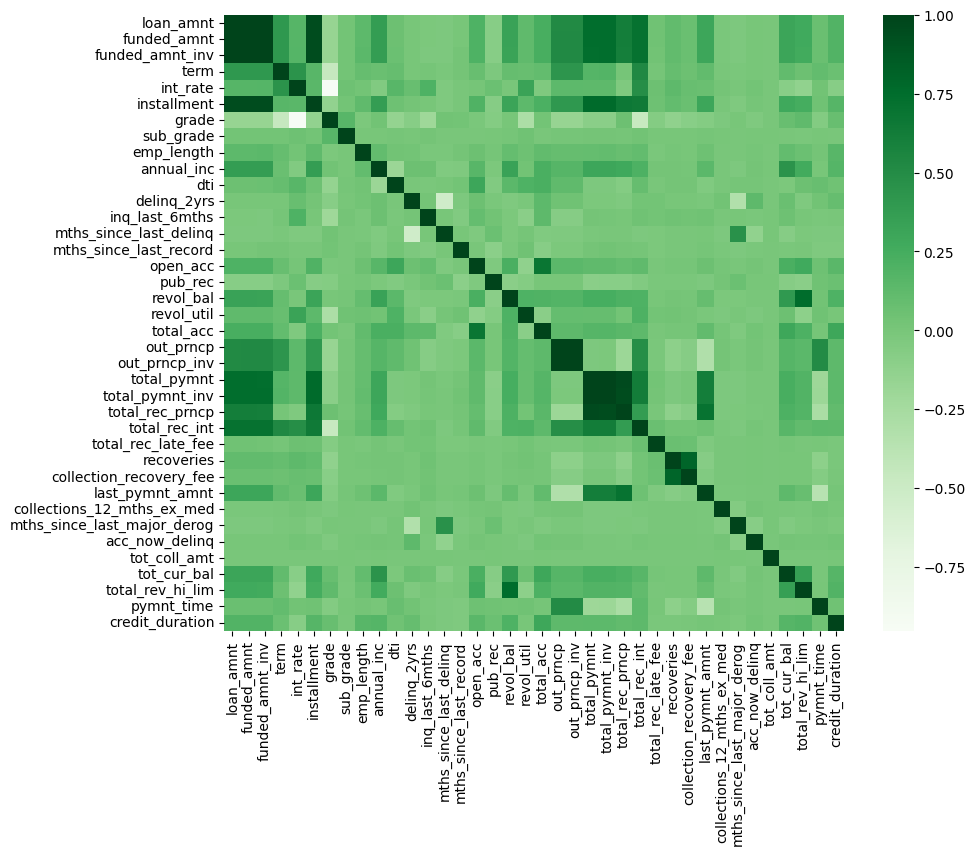

In [33]:
numeric_data = df.select_dtypes(include=['int64', 'float64'])

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), cmap='Greens')
plt.show()

In [34]:
corr_data = numeric_data.corr().abs()
upper = corr_data.where(np.triu(np.ones(corr_data.shape, dtype=bool), k=1))

high_corr = [col for col in upper.columns if any(upper[col] > 0.7)]

print(high_corr)

['funded_amnt', 'funded_amnt_inv', 'installment', 'grade', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'collection_recovery_fee', 'last_pymnt_amnt', 'total_rev_hi_lim']


In [35]:
df.drop(high_corr, axis=1, inplace=True)

numerical = df.select_dtypes(include=['float64', 'int64']).columns

df.head()

loan_amnt  term  int_rate  sub_grade  emp_length home_ownership  \
0     5000.0  36.0     10.65          2        10.0           RENT   
1     2500.0  60.0     15.27          4         0.0           RENT   
2     2400.0  36.0     15.96          5        10.0           RENT   
3    10000.0  36.0     13.49          1        10.0           RENT   
4     3000.0  60.0     12.69          5         1.0           RENT   

   annual_inc verification_status  loan_status         purpose    dti  \
0     24000.0            Verified   Fully Paid     credit_card  27.65   
1     30000.0     Source Verified  Charged Off             car   1.00   
2     12252.0        Not Verified   Fully Paid  small_business   8.72   
3     49200.0     Source Verified   Fully Paid           other  20.00   
4     80000.0     Source Verified      Current           other  17.94   

   delinq_2yrs  inq_last_6mths  mths_since_last_delinq  \
0          0.0             1.0                34.10443   
1          0.0             5.0                34.10443   
2          0.0             2.0                34.10443   
3          0.0             1.0                35.00000   
4          0.0             0.0                38.00000   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0               74.306012       3.0      0.0    13648.0        83.7   
1               74.306012       3.0      0.0     1687.0         9.4   
2               74.306012       2.0      0.0     2956.0        98.5   
3               74.306012      10.0      0.0     5598.0        21.0   
4               74.306012      15.0      0.0    27783.0        53.9   

   total_acc initial_list_status  out_prncp  total_rec_late_fee  recoveries  \
0        9.0                   f        0.0                0.00        0.00   
1        4.0                   f        0.0                0.00      117.08   
2       10.0                   f        0.0                0.00        0.00   
3       37.0                   f        0.0               16.97        0.00   
4       38.0                   f      766.9                0.00        0.00   

   collections_12_mths_ex_med  mths_since_last_major_derog  acc_now_delinq  \
0                         0.0                    42.852547             0.0   
1                         0.0                    42.852547             0.0   
2                         0.0                    42.852547             0.0   
3                         0.0                    42.852547             0.0   
4                         0.0                    42.852547             0.0   

   tot_coll_amt    tot_cur_bal  pymnt_time  credit_duration  
0    191.913517  138801.713385         0.0             31.0  
1    191.913517  138801.713385         0.0             14.0  
2    191.913517  138801.713385         0.0             14.0  
3    191.913517  138801.713385         0.0             18.0  
4    191.913517  138801.713385         1.0             20.0

Next we will see where our data is skewed.

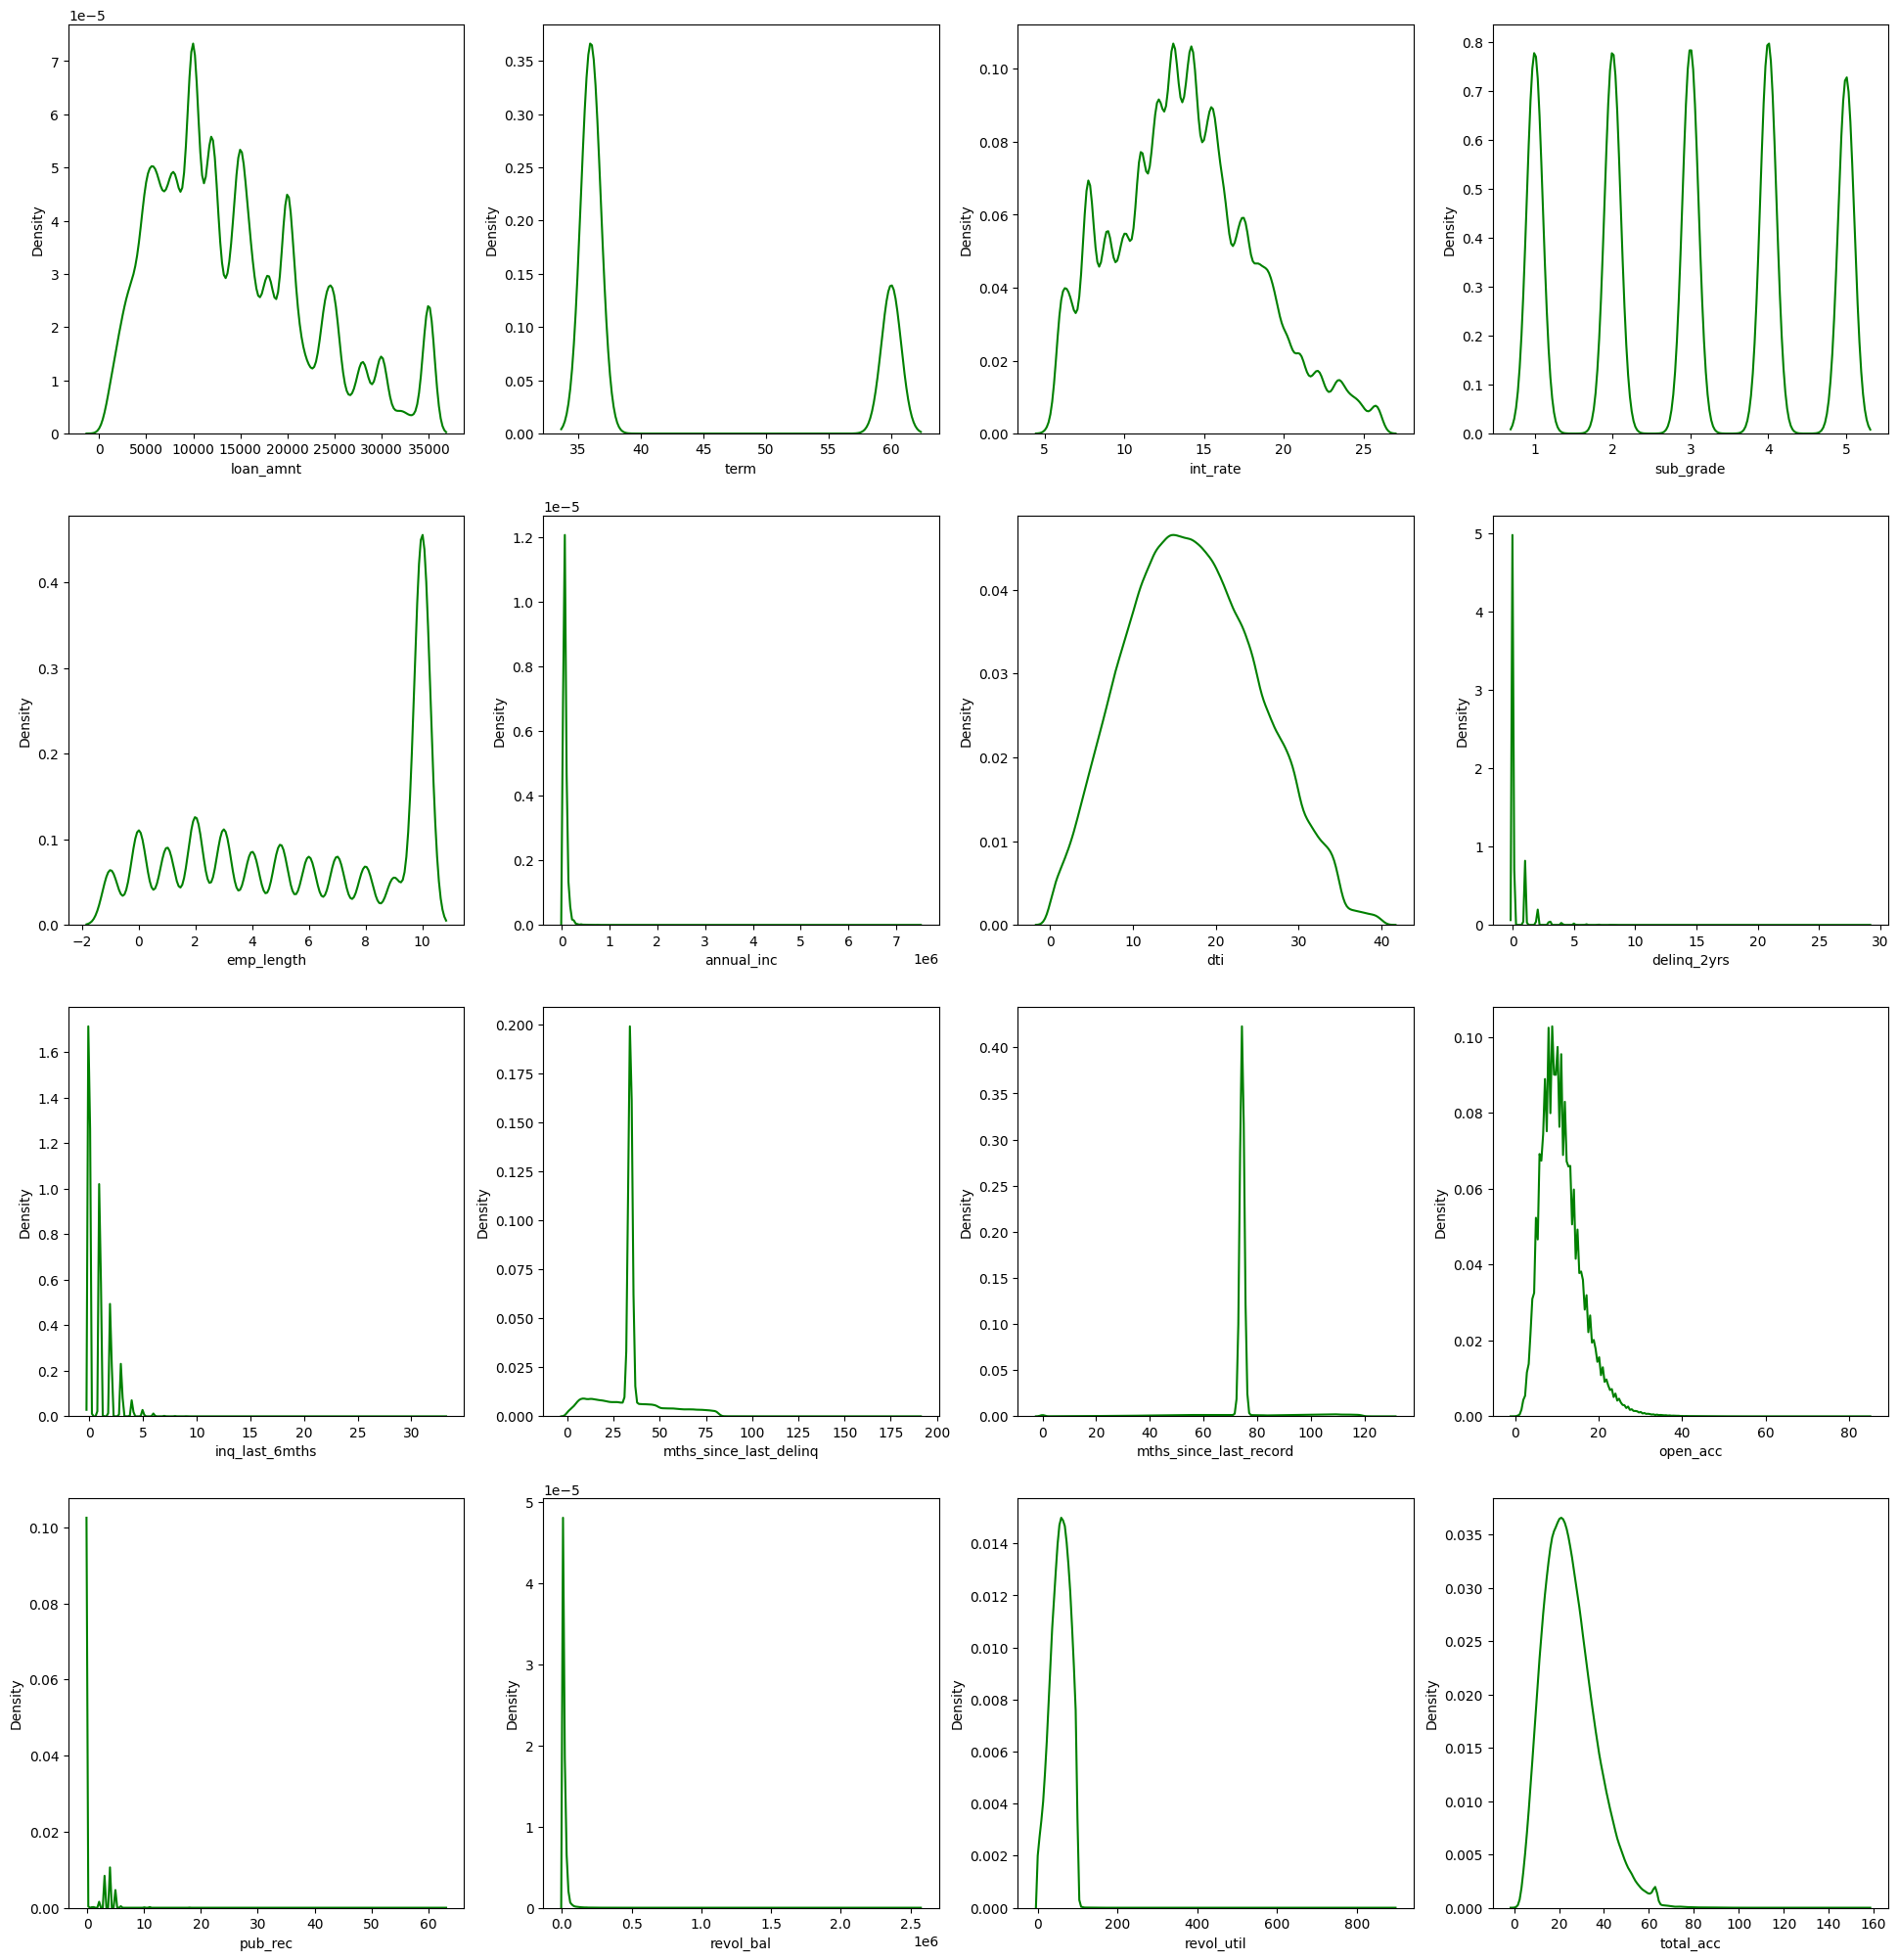

In [36]:
fig = plt.figure(figsize=(24, 25))

columns = 4
rows = 4


for i in range(16):
    fig.add_subplot(rows, columns, i+1)
    sns.kdeplot(df[numerical[i]], color="g")
    
plt.show()

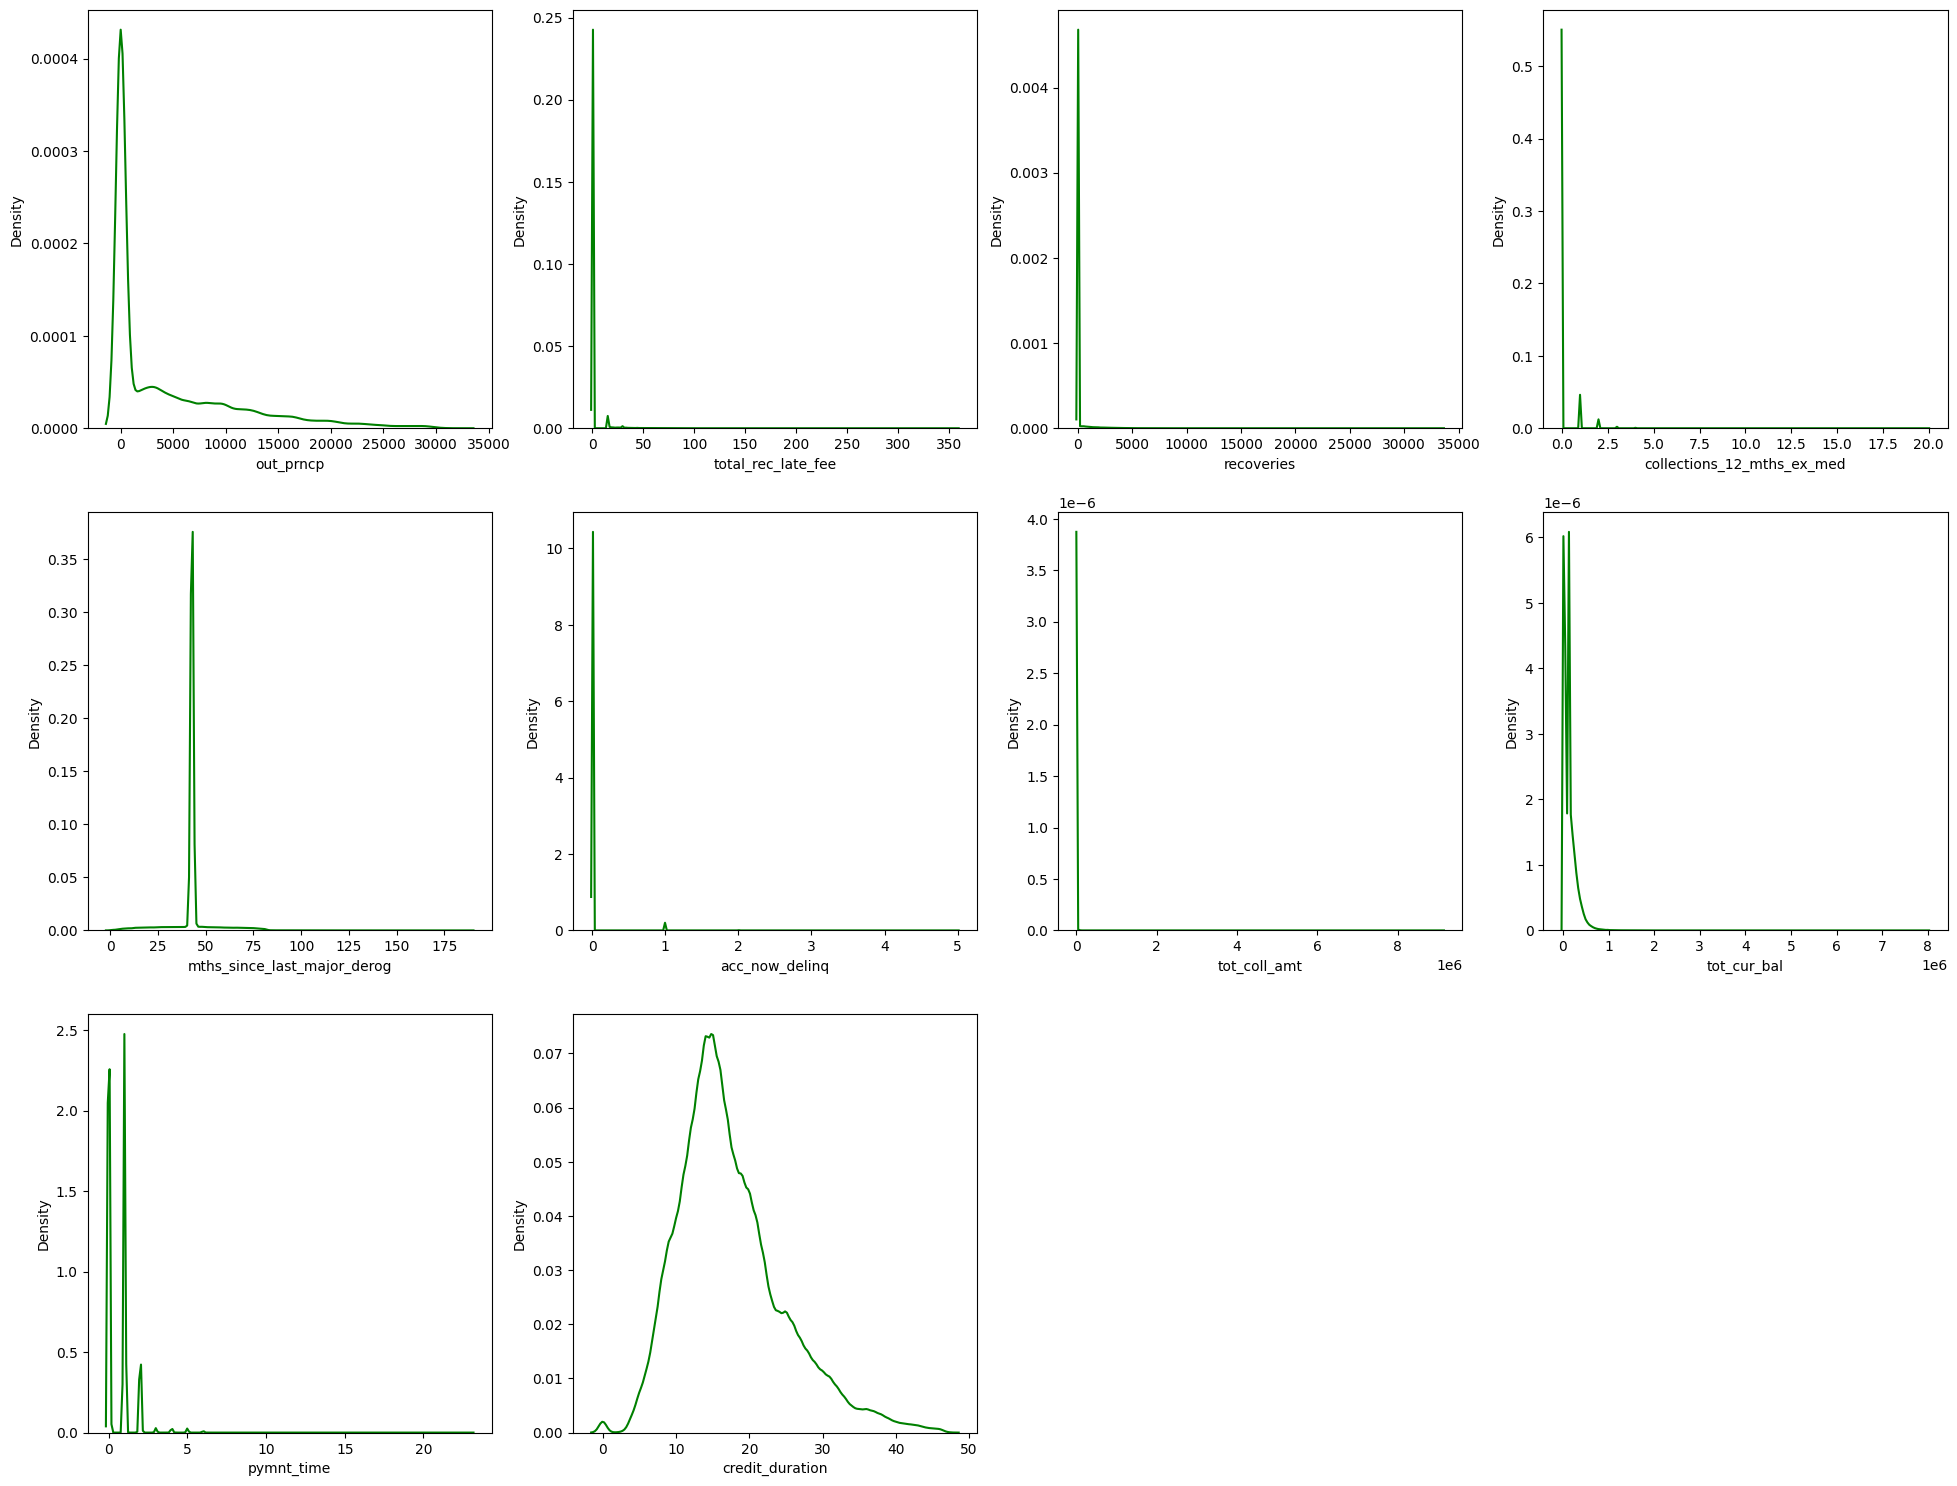

In [37]:
fig = plt.figure(figsize=(24, 25))

columns = 4
rows = 4

index = len(numerical) - 16

for i in range(10):
    fig.add_subplot(rows, columns, i+1) 
    sns.kdeplot(df[numerical[i+16]], color="g")

plt.show()

Most of the features is positively skewed. Next we will look at outliers in our data.

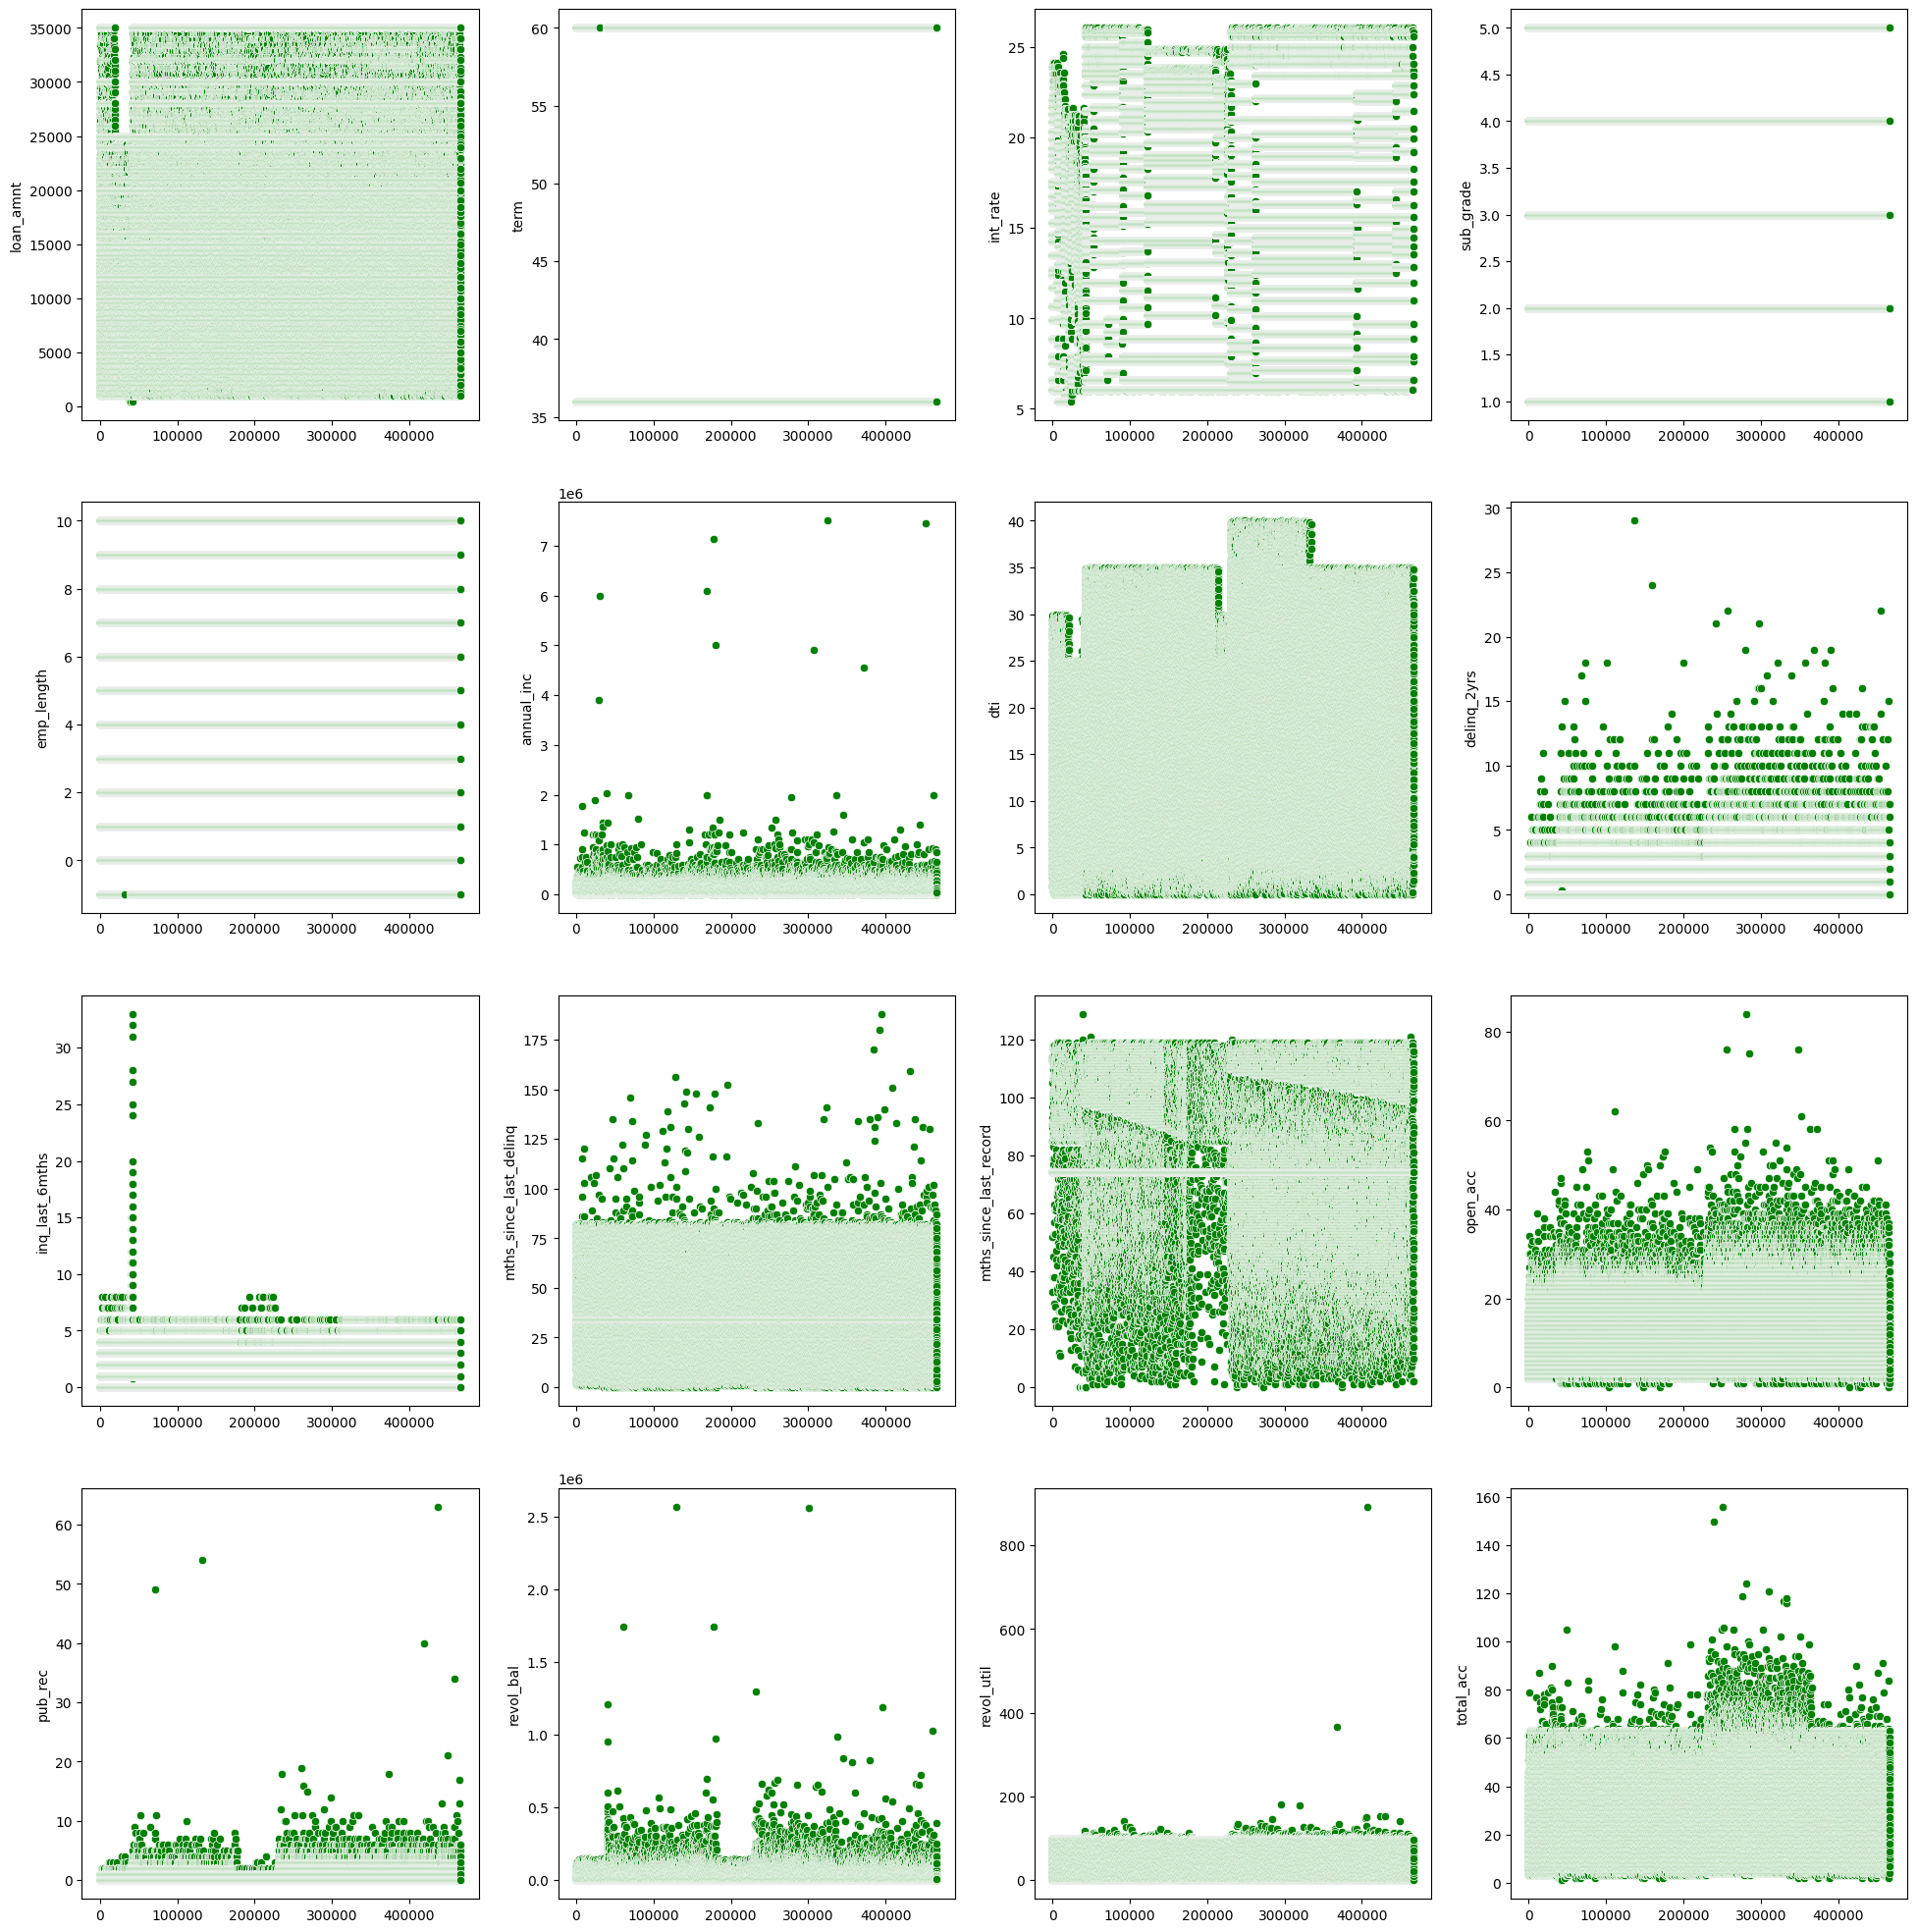

In [38]:
fig = plt.figure(figsize=(24, 25))

columns = 4
rows = 4


for i in range(16):
    fig.add_subplot(rows, columns, i+1)
    sns.scatterplot(df[numerical[i]], color="g")

plt.show()

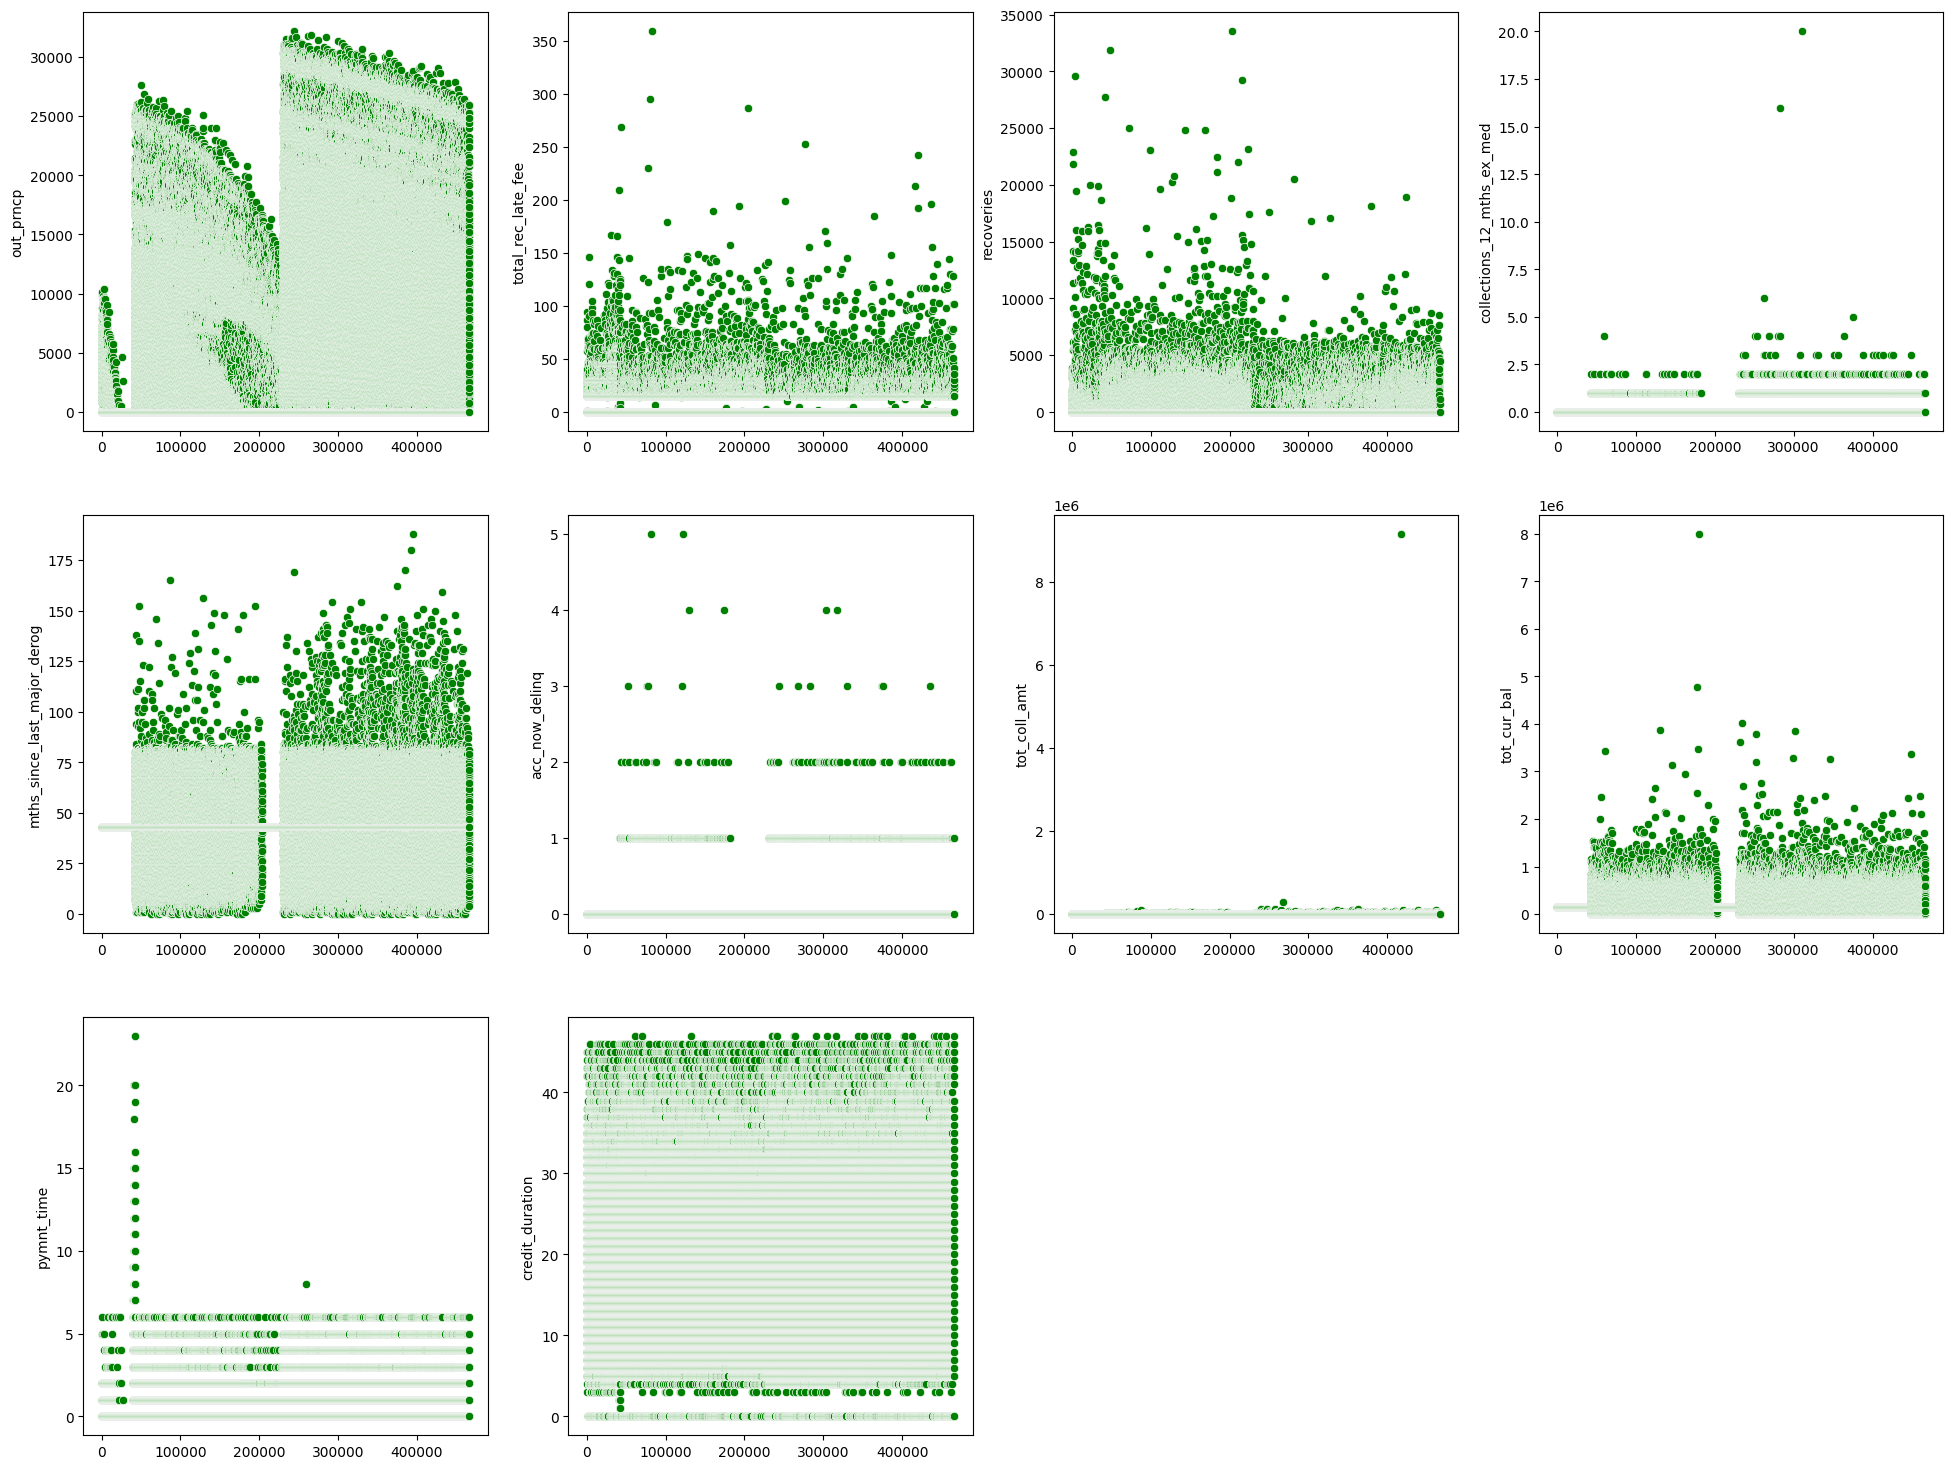

In [39]:
fig = plt.figure(figsize=(24, 25))

columns = 4
rows = 4

index = len(numerical) - 16

for i in range(index):
    fig.add_subplot(rows, columns, i+1)
    sns.scatterplot(df[numerical[i+16]], color="g")

plt.show()

Most of the features have outliers, let's count them with help of first and third quartile.

In [40]:
def count_outliers(dataframe, column, multiplier=1.5):
    q1 = dataframe[column].quantile(0.25)
    q3 = dataframe[column].quantile(0.75)    
    iqr = q3 - q1
    
    lower_bound = q1 - (multiplier * iqr)
    upper_bound = q3 + (multiplier * iqr)
    
    outliers = len(dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)])
    
    return outliers

In [41]:
for col in numerical:
    outliers = count_outliers(df, col)
    print(col , ' have ' , outliers , ' outliers out of ' , len(df[col]) , '(' , (outliers / len(df[col])) * 100 , '%)')

loan_amnt  have  0  outliers out of  466285 ( 0.0 %)
term  have  0  outliers out of  466285 ( 0.0 %)
int_rate  have  4904  outliers out of  466285 ( 1.051717297361056 %)
sub_grade  have  0  outliers out of  466285 ( 0.0 %)
emp_length  have  0  outliers out of  466285 ( 0.0 %)
annual_inc  have  19899  outliers out of  466285 ( 4.267561684377581 %)
dti  have  43  outliers out of  466285 ( 0.009221827852064724 %)
delinq_2yrs  have  83331  outliers out of  466285 ( 17.87125899396292 %)
inq_last_6mths  have  36785  outliers out of  466285 ( 7.888952035772114 %)


mths_since_last_delinq  have  212833  outliers out of  466285 ( 45.644402028802126 %)
mths_since_last_record  have  62638  outliers out of  466285 ( 13.433415185991402 %)
open_acc  have  10440  outliers out of  466285 ( 2.2389740180361795 %)
pub_rec  have  61392  outliers out of  466285 ( 13.166196639394363 %)
revol_bal  have  22879  outliers out of  466285 ( 4.906655800636949 %)
revol_util  have  19  outliers out of  466285 ( 0.004074761143935576 %)
total_acc  have  8674  outliers out of  466285 ( 1.86023569276301 %)
out_prncp  have  23331  outliers out of  466285 ( 5.003592223640049 %)
total_rec_late_fee  have  10678  outliers out of  466285 ( 2.2900157628917936 %)
recoveries  have  24371  outliers out of  466285 ( 5.226631780992311 %)
collections_12_mths_ex_med  have  4059  outliers out of  466285 ( 0.8704976570123422 %)
mths_since_last_major_derog  have  98974  outliers out of  466285 ( 21.22607418209893 %)
acc_now_delinq  have  1761  outliers out of  466285 ( 0.3776660197089763 %)

It appears that only 1 column has a severe outliers, so we won't remove it for later model training.

## DEFINING TARGET VARIABLE AND LABELING

We choose `loan_status` for our target variable. Because it contains information about client's current status of the loan.

In [42]:
df['loan_status'].value_counts()

loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64

We define loan status and label it based on wheter it is risky or safe. 
<ol>
    <li>Current : Safe</li>
    <li>Fully Paid : Safe</li>
    <li>Charged Off : Risk</li>
    <li>Late (31-120 days) : Risk</li>
    <li>In Grace Period : Safe</li>
    <li>Does not meet the credit policy. Status:Fully Paid : Safe</li>
    <li>Late (16-30 days) : Risk</li>
    <li>Default : Risk</li>
    <li>Does not meet the credit policy. Status:Charged Off : Risk</li>
</ol><br>
Then we put them into one group and create a new column that determines wheter the loan is good or not.

In [43]:
good_dict = [
    'Current', 
    'Fully Paid', 
    'In Grace Period',
    'Does not meet the credit policy. Status:Fully Paid'
]

df['good_loan'] = np.where(df['loan_status'].isin(good_dict), 1, 0)

We labeled good loan as 1 and bad loan as 0.

good_loan
1    414099
0     52186
Name: count, dtype: int64


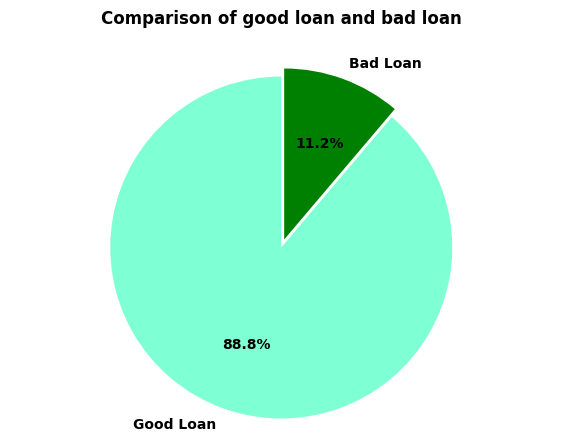

In [44]:
print(df['good_loan'].value_counts())

churn = df['good_loan'].value_counts()
text_props = {'weight': 'bold'}

plt.figure(figsize=(7, 5))
plt.pie(churn, labels=['Good Loan', 'Bad Loan'], autopct='%1.1f%%', startangle=90, colors=['aquamarine', 'green'], textprops=text_props, explode=(0.05, 0))
plt.axis('equal')
plt.title('Comparison of good loan and bad loan', fontweight='bold', pad=20)
plt.show()

It turns out there is a huge difference between number of good loan and number of bad loan. We need to handle the class imbalance later.

In [45]:
df.drop('loan_status', axis=1, inplace=True)

Then we will drop `loan_status` because it is no longer needed

## FEATURE SCALING

Next we will scale our numerical data with StandardScaler.

In [46]:
sc = StandardScaler()
scaled = pd.DataFrame(sc.fit_transform(df[numerical]), columns=numerical)

In [47]:
scaled.head()

loan_amnt      term  int_rate  sub_grade  emp_length  annual_inc       dti  \
0  -1.124392 -0.616225 -0.729587  -0.698965    1.128471   -0.896551  1.328632   
1  -1.426088  1.622784  0.330634   0.728226   -1.482675   -0.787387 -2.065791   
2  -1.438156 -0.616225  0.488979   1.441821    1.128471   -1.110294 -1.082491   
3  -0.521001 -0.616225 -0.077850  -1.412560    1.128471   -0.438063  0.354248   
4  -1.365749  1.622784 -0.261438   1.441821   -1.221560    0.122311  0.091865   

   delinq_2yrs  inq_last_6mths  mths_since_last_delinq  \
0    -0.357035        0.178877           -4.794339e-16   
1    -0.357035        3.843347           -4.794339e-16   
2    -0.357035        1.094994           -4.794339e-16   
3    -0.357035        0.178877            6.042797e-02   
4    -0.357035       -0.737241            2.628509e-01   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0           -2.554420e-15 -1.641562 -0.31431  -0.124888    1.160138   
1           -2.554420e-15 -1.641562 -0.31431  -0.703378   -1.971718   
2           -2.554420e-15 -1.842068 -0.31431  -0.642003    1.783980   
3           -2.554420e-15 -0.238015 -0.31431  -0.514224   -1.482761   
4           -2.554420e-15  0.764518 -0.31431   0.558748   -0.095977   

   total_acc  out_prncp  total_rec_late_fee  recoveries  \
0  -1.384892  -0.693944           -0.123464   -0.154549   
1  -1.815936  -0.693944           -0.123464    0.057470   
2  -1.298684  -0.693944           -0.123464   -0.154549   
3   1.028949  -0.693944            3.099264   -0.154549   
4   1.115158  -0.573268           -0.123464   -0.154549   

   collections_12_mths_ex_med  mths_since_last_major_derog  acc_now_delinq  \
0                   -0.083634                          0.0        -0.05831   
1                   -0.083634                          0.0        -0.05831   
2                   -0.083634                          0.0        -0.05831   
3                   -0.083634                          0.0        -0.05831   
4                   -0.083634                          0.0        -0.05831   

   tot_coll_amt  tot_cur_bal  pymnt_time  credit_duration  
0           0.0          0.0   -0.760280         1.899572  
1           0.0          0.0   -0.760280        -0.471354  
2           0.0          0.0   -0.760280        -0.471354  
3           0.0          0.0   -0.760280         0.086511  
4           0.0          0.0    0.471392         0.365443

## FINALIZE DATAFRAME

This is our final step before moving on to training the model. We will merge the one hot encoding dataframe, scaled dataframe, and our target label `good_loan` into our final dataframe.

In [48]:
data = pd.concat([onehot, scaled, df[['good_loan']]], axis=1)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466285 entries, 0 to 466284
Data columns (total 50 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   home_ownership_MORTGAGE              466285 non-null  int32  
 1   home_ownership_OTHER                 466285 non-null  int32  
 2   home_ownership_OWN                   466285 non-null  int32  
 3   home_ownership_RENT                  466285 non-null  int32  
 4   verification_status_Not Verified     466285 non-null  int32  
 5   verification_status_Source Verified  466285 non-null  int32  
 6   verification_status_Verified         466285 non-null  int32  
 7   purpose_car                          466285 non-null  int32  
 8   purpose_credit_card                  466285 non-null  int32  
 9   purpose_debt_consolidation           466285 non-null  int32  
 10  purpose_educational                  466285 non-null  int32  
 11  purpose_home_impro

In total, we will process 50 columns for our model training.

In [50]:
data.to_csv('preprocessed_data.csv', index=False)

## MODELING

Before we go train our model, we need to split the final dataframe into train data and test data. We chose 70% : 30% ratio for splitting.

### TRAIN-TEST SPLIT

In [51]:
X = data.drop('good_loan', axis=1)
y = data['good_loan']

In [52]:
y.value_counts()

good_loan
1    414099
0     52186
Name: count, dtype: int64

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((326399, 49), (139886, 49), (326399,), (139886,))

This will be our training and testing data.

## TRAINING

For our model training, we choose 6 different algorithms. We will need to load the packages first.

In [54]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

We will evaluate all the algorithms with number of mislabeled, accuracy, roc value, and ks value for our consideration.

### Naive Bayes

In [55]:
gnb = GaussianNB()

y_pred = gnb.fit(X_train, y_train).predict(X_test)
y_prob = gnb.fit(X_train, y_train).predict_proba(X_test)

print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 139886 points : 10979


In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.55      0.61     15750
           1       0.94      0.97      0.96    124136

    accuracy                           0.92    139886
   macro avg       0.82      0.76      0.79    139886
weighted avg       0.92      0.92      0.92    139886



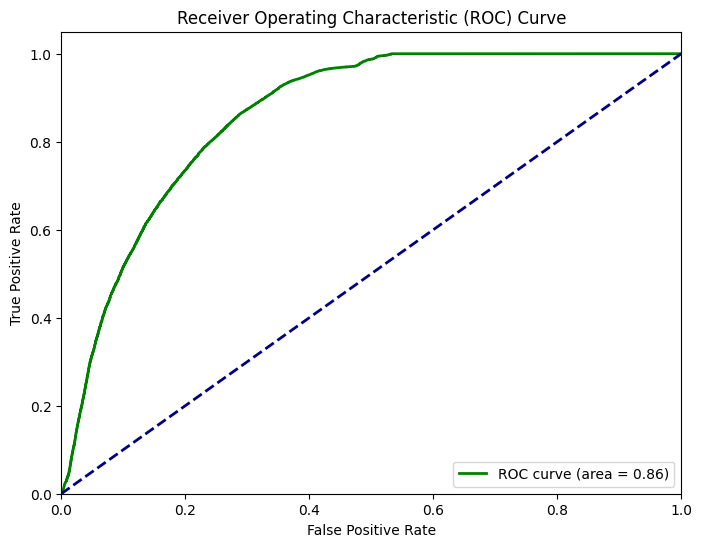

In [57]:
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = roc_auc_score(y_test, y_prob[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [58]:
class0 = y_prob[y_test == 0]
class1 = y_prob[y_test == 1]

ks = ks_2samp(class0, class1)

print("Kolmogorov-Smirnov (KS) : %.4f" % ks.statistic[1])

Kolmogorov-Smirnov (KS) : 0.5751


### Logistic Regression

In [59]:
lr = LogisticRegression()

y_pred = lr.fit(X_train, y_train).predict(X_test)
y_prob = lr.fit(X_train, y_train).predict_proba(X_test)

print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 139886 points : 8020


In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.50      0.66     15750
           1       0.94      1.00      0.97    124136

    accuracy                           0.94    139886
   macro avg       0.96      0.75      0.82    139886
weighted avg       0.94      0.94      0.93    139886



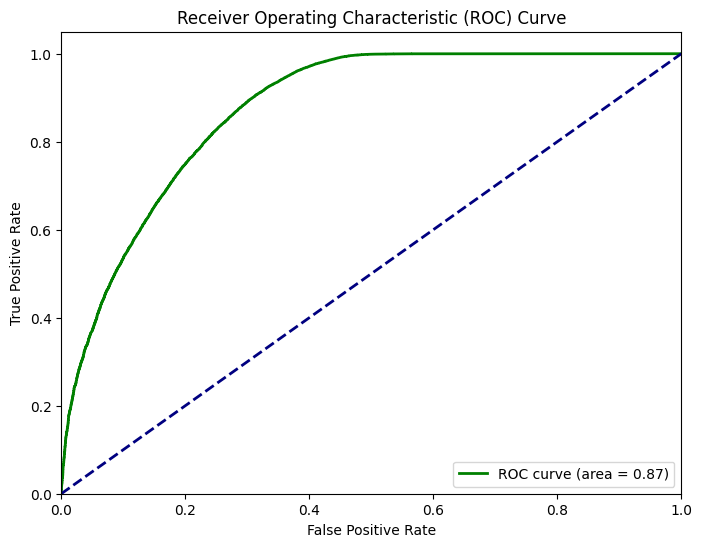

In [61]:
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = roc_auc_score(y_test, y_prob[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [62]:
class0 = y_prob[y_test == 0]
class1 = y_prob[y_test == 1]

ks = ks_2samp(class0, class1)

print("Kolmogorov-Smirnov (KS) : %.4f" % ks.statistic[1])

Kolmogorov-Smirnov (KS) : 0.5922


### K Nearest Neighbors

In [63]:
knn = KNeighborsClassifier()

y_pred = knn.fit(X_train, y_train).predict(X_test)
y_prob = knn.fit(X_train, y_train).predict_proba(X_test)

print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 139886 points : 10543


In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.40      0.54     15750
           1       0.93      0.99      0.96    124136

    accuracy                           0.92    139886
   macro avg       0.89      0.70      0.75    139886
weighted avg       0.92      0.92      0.91    139886



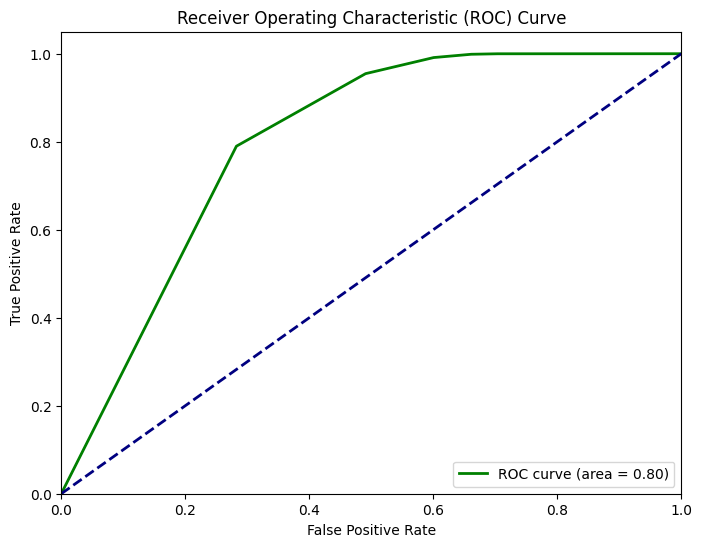

In [65]:
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = roc_auc_score(y_test, y_prob[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [66]:
class0 = y_prob[y_test == 0]
class1 = y_prob[y_test == 1]

ks = ks_2samp(class0, class1)

print("Kolmogorov-Smirnov (KS) : %.4f" % ks.statistic[1])

Kolmogorov-Smirnov (KS) : 0.5073


### Decision Tree

In [67]:
dt = DecisionTreeClassifier()

y_pred = dt.fit(X_train, y_train).predict(X_test)
y_prob = dt.fit(X_train, y_train).predict_proba(X_test)

print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 139886 points : 11755


In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.66      0.64     15750
           1       0.96      0.95      0.95    124136

    accuracy                           0.92    139886
   macro avg       0.79      0.80      0.80    139886
weighted avg       0.92      0.92      0.92    139886



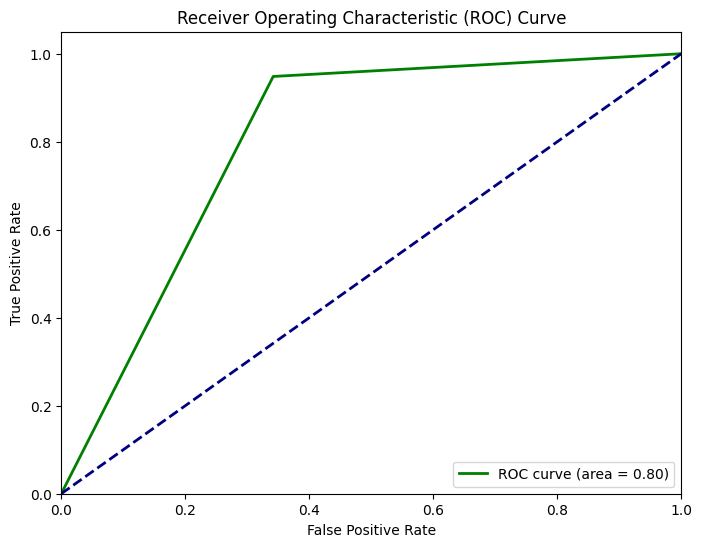

In [69]:
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = roc_auc_score(y_test, y_prob[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [70]:
class0 = y_prob[y_test == 0]
class1 = y_prob[y_test == 1]

ks = ks_2samp(class0, class1)

print("Kolmogorov-Smirnov (KS) : %.4f" % ks.statistic[1])

Kolmogorov-Smirnov (KS) : 0.6065


### Gradient Boosting

In [71]:
gbc = GradientBoostingClassifier()

y_pred = gbc.fit(X_train, y_train).predict(X_test)
y_prob = gbc.fit(X_train, y_train).predict_proba(X_test)

print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 139886 points : 6372


In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.60      0.75     15750
           1       0.95      1.00      0.97    124136

    accuracy                           0.95    139886
   macro avg       0.97      0.80      0.86    139886
weighted avg       0.96      0.95      0.95    139886



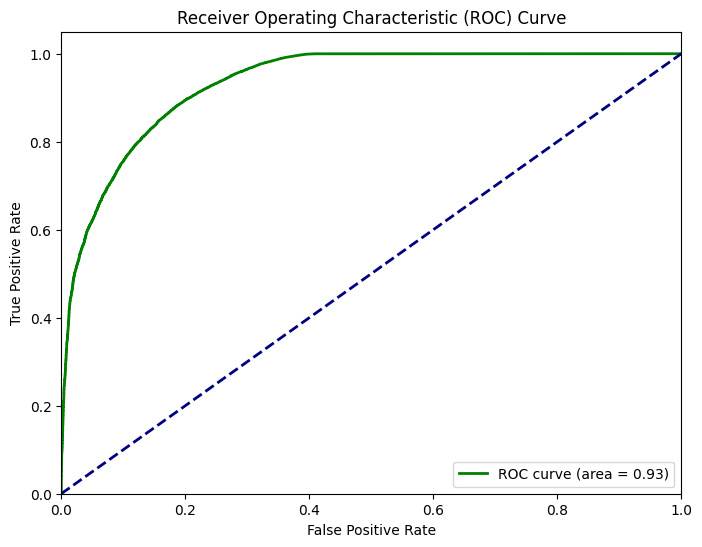

In [73]:
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = roc_auc_score(y_test, y_prob[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [74]:
class0 = y_prob[y_test == 0]
class1 = y_prob[y_test == 1]

ks = ks_2samp(class0, class1)

print("Kolmogorov-Smirnov (KS) : %.4f" % ks.statistic[1])

Kolmogorov-Smirnov (KS) : 0.6953


### XGBoost

In [75]:
xgbc = xgb.XGBClassifier()

y_pred = xgbc.fit(X_train, y_train).predict(X_test)
y_prob = xgbc.fit(X_train, y_train).predict_proba(X_test)

print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 139886 points : 6480


In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.60      0.75     15750
           1       0.95      1.00      0.97    124136

    accuracy                           0.95    139886
   macro avg       0.96      0.80      0.86    139886
weighted avg       0.95      0.95      0.95    139886



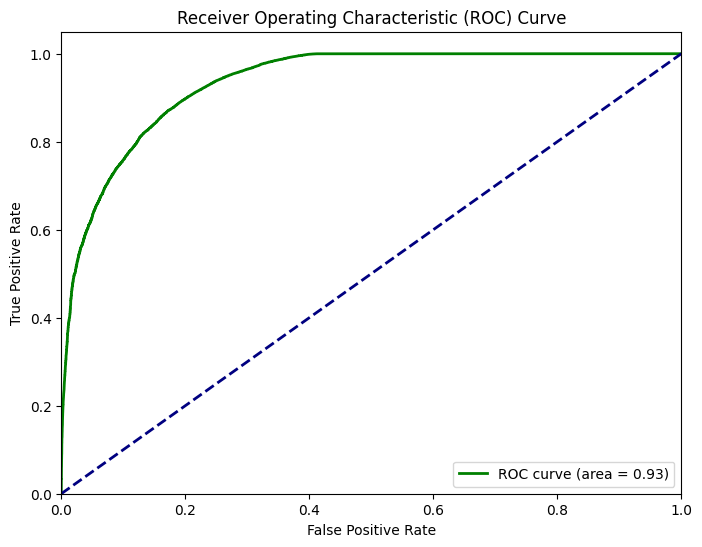

In [77]:
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = roc_auc_score(y_test, y_prob[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [78]:
class0 = y_prob[y_test == 0]
class1 = y_prob[y_test == 1]

ks = ks_2samp(class0, class1)

print("Kolmogorov-Smirnov (KS) : %.4f" % ks.statistic[1])

Kolmogorov-Smirnov (KS) : 0.6986


It seems that our chosen model is between XGBoost and Gradient Boosting. So, we will choose our model with runtime as our final consideration. This is their runtime :
* XGBoost : 5.5s
* Gradient Boosting : 4m 21.3s

With this, our chosen model will be XGBoost.

## MODEL OPTIMIZATION & EVALUATION

Chosen Model : XGBoost

### HYPERPARAMETER TUNING

We will improve our model by searching the best hyperparameters. Our chosen parameter grid is `max_depth`, `learning_rate`, and `n_estimators`.

In [79]:
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300]    
}

grid_search = GridSearchCV(estimator=xgbc, param_grid=param_grid, scoring='roc_auc', cv=3)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters : " , grid_search.best_params_)

Best Hyperparameters :  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}


In [80]:
best_xgbc = grid_search.best_estimator_

best_xgbc.fit(X_train, y_train)

print("Accuracy : " , best_xgbc.score(X_test, y_test))

Accuracy :  0.954162675321333


We can see that the accuracy is improving slightly. Actually, this did not meet up our expectation.

### MODEL RETRAIN

We're going to retrain our model for more detailed result.

In [81]:
y_pred = best_xgbc.fit(X_train, y_train).predict(X_test)
y_prob = best_xgbc.fit(X_train, y_train).predict_proba(X_test)

print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 139886 points : 6412


In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.60      0.75     15750
           1       0.95      1.00      0.97    124136

    accuracy                           0.95    139886
   macro avg       0.97      0.80      0.86    139886
weighted avg       0.96      0.95      0.95    139886



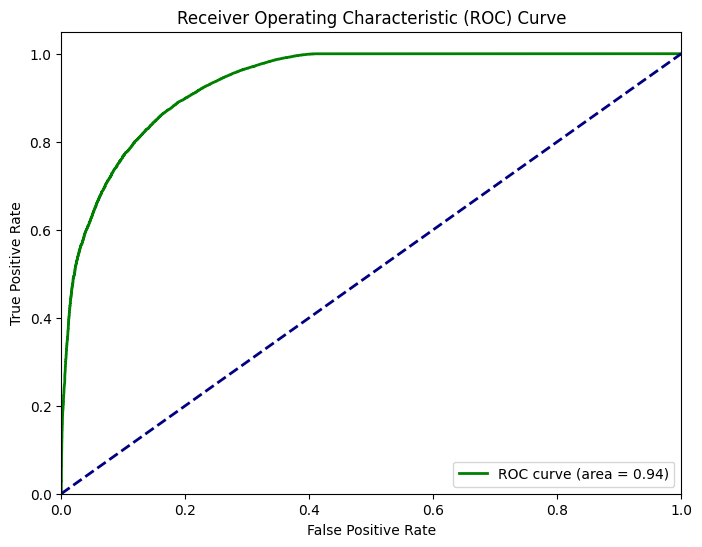

In [83]:
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = roc_auc_score(y_test, y_prob[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [84]:
class0 = y_prob[y_test == 0]
class1 = y_prob[y_test == 1]

ks = ks_2samp(class0, class1)

print("Kolmogorov-Smirnov (KS) : %.4f" % ks.statistic[1])

Kolmogorov-Smirnov (KS) : 0.7014


It seems our hunch is right, our model is improving very slightly. Actually, because of this we can try to use ensemble method to compare the result, but because there's not much time left so we won't do that for now.

Next we will try to examine the confusion matrix to better understand our model.

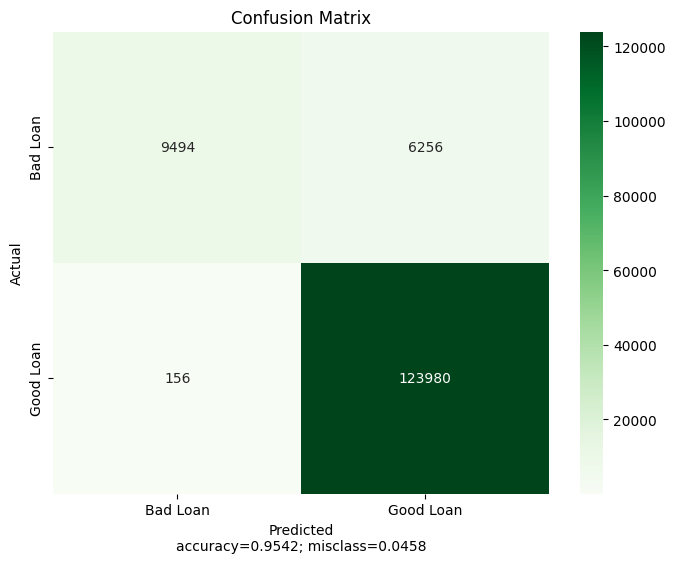

In [85]:
conf_matrix = confusion_matrix(y_test, y_pred)
target_names = ['Bad Loan', 'Good Loan']

accuracy = np.trace(conf_matrix) / np.sum(conf_matrix).astype('float')
misclass = 1 - accuracy

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
plt.show()

There's a chance that our model is overfit or underfit. Let's check that with learning curve.

### LEARNING CURVE

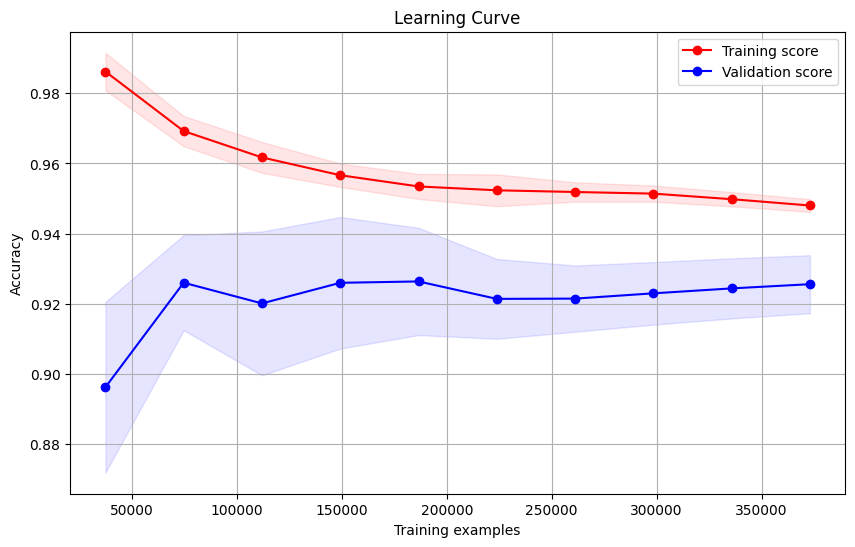

In [86]:
train_sizes = np.linspace(0.1, 1.0, 10)

model = best_xgbc

train_sizes_abs, train_scores, test_scores = learning_curve(model, X, y, train_sizes=train_sizes, cv=5, scoring='roc_auc')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes_abs, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes_abs, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="b")
plt.plot(train_sizes_abs, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes_abs, test_scores_mean, 'o-', color="b", label="Validation score")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.grid(True)
plt.show()

From the graphic we can tell that there is nothing wrong with our model, let's check the mean and the standard deviation.

In [87]:
print("Mean training scores:", train_scores_mean)
print("Standard deviation of training scores:", train_scores_std)
print("Mean validation scores:", test_scores_mean)
print("Standard deviation of validation scores:", test_scores_std)

Mean training scores: [0.98623111 0.96923001 0.96172367 0.95664304 0.95343755 0.95233879
 0.95185441 0.95139267 0.949803   0.94800514]
Standard deviation of training scores: [0.00535904 0.00430203 0.00440561 0.00333934 0.00357933 0.00454531
 0.00276754 0.00230209 0.00204066 0.00182016]
Mean validation scores: [0.89613635 0.92597333 0.92006907 0.92594784 0.92633545 0.9213612
 0.92143588 0.92294197 0.92435238 0.92554941]
Standard deviation of validation scores: [0.02437474 0.01357519 0.02050971 0.01877134 0.01530363 0.01139327
 0.00945719 0.00892598 0.00858159 0.00827771]


We can be sure that our model is safe from overfit or underfit

## FEATURE IMPORTANCE

Now let's look at the important features of our model

In [88]:
importances = best_xgbc.feature_importances_

indices = np.argsort(importances)[::-1]

feature = X_train.columns

top_indices = indices[:10]

for i in range(10):
    print("%d. %s (%.4f)" % (i + 1, feature[top_indices[i]], importances[top_indices[i]] * 100))

1. recoveries (77.0097)
2. pymnt_time (9.6390)
3. out_prncp (3.0980)
4. total_rec_late_fee (1.6678)
5. term (1.4543)
6. initial_list_status_f (1.0939)
7. int_rate (0.8015)
8. dti (0.3312)
9. tot_coll_amt (0.3003)
10. annual_inc (0.2745)


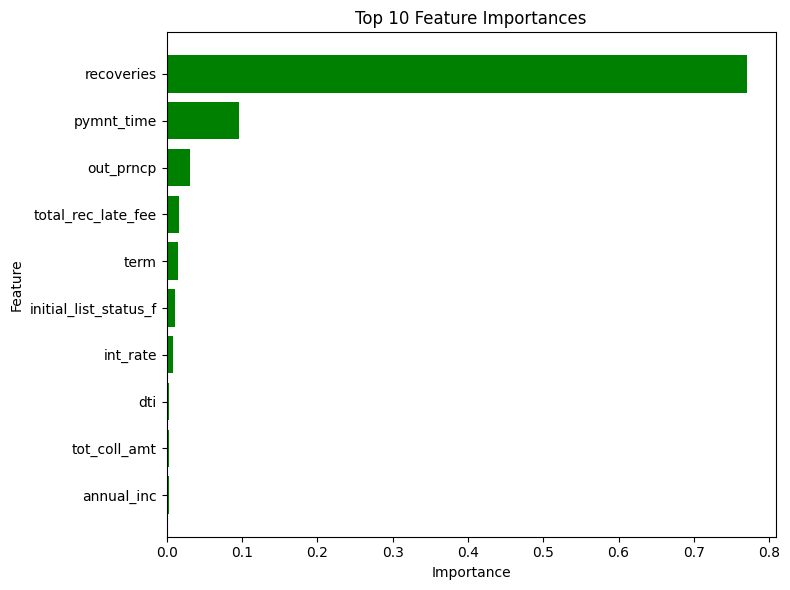

In [89]:
plt.figure(figsize=(8, 6))
plt.title("Top 10 Feature Importances")
plt.barh(range(10), importances[top_indices][::-1], align="center", color = 'g')
plt.yticks(range(10), feature[top_indices][::-1])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

It seems our top important features is `recoveries` with 77% score. Let's select our top important features with a score above 0.5%.

### IMPORTANCE FEATURES TRAINING

Next, we will retrain our model with our selected important features (`recoveries`, `pymnt_time`, `out_prncp`, `total_rec_late_fee`, `term`, `initial_list_status_f`, `int_rate`)

In [90]:
X_important = data[['recoveries', 'pymnt_time', 'out_prncp', 'total_rec_late_fee', 'term', 'initial_list_status_f', 'int_rate']]
new_X_train = X_train[['recoveries', 'pymnt_time', 'out_prncp', 'total_rec_late_fee', 'term', 'initial_list_status_f', 'int_rate']]
new_X_test = X_test[['recoveries', 'pymnt_time', 'out_prncp', 'total_rec_late_fee', 'term', 'initial_list_status_f', 'int_rate']]

new_X_train.shape, new_X_test.shape

((326399, 7), (139886, 7))

In [91]:
new_model = best_xgbc

y_pred = new_model.fit(new_X_train, y_train).predict(new_X_test)
y_prob = new_model.fit(new_X_train, y_train).predict_proba(new_X_test)

print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 139886 points : 6423


In [92]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.60      0.75     15750
           1       0.95      1.00      0.97    124136

    accuracy                           0.95    139886
   macro avg       0.97      0.80      0.86    139886
weighted avg       0.96      0.95      0.95    139886



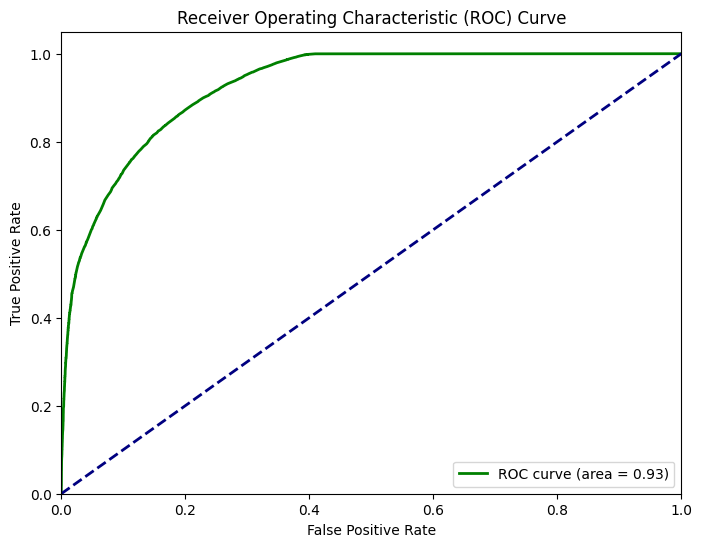

In [93]:
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = roc_auc_score(y_test, y_prob[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2,
         label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [94]:
class0 = y_prob[y_test == 0]
class1 = y_prob[y_test == 1]

ks = ks_2samp(class0, class1)

print("Kolmogorov-Smirnov (KS) : %.4f" % ks.statistic[1])

Kolmogorov-Smirnov (KS) : 0.6725


It turns out that the resulting difference is quite small.


So in conclusion, our selected model is XGBoost Classifier. The important features of our model are :
* `recoveries` : Indicates if a payment plan has been put in place for the loan
* `pymnt_time` : Number of months between `last_pymnt_d` and `next_pymnt_d`
* `out_prncp` : Remaining outstanding principal for total amount funded
* `total_rec_late_fee` : Late fees received to this date
* `term` : The number of payments on the loan. Values are in months and can be either 36 or 60.
* `initial_list_status_f` : The initial listing status of the loan. Possible values are – Whole, Fractional (in this case it is Fractional)
* `int_rate` : Indicates if income was verified by LC, not verified, or if the income source was verified

In [95]:
new_data = pd.concat([df[['recoveries', 'pymnt_time', 'out_prncp', 'total_rec_late_fee', 'term', 'int_rate']], onehot['initial_list_status_f']], axis=1)

scaler = StandardScaler()
scaled_important = pd.DataFrame(scaler.fit_transform(new_data), columns=new_data.columns)

scaled_important.sample(10)

pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [96]:
model = grid_search.best_estimator_
model.fit(scaled_important, y)

pickle.dump(model, open('xgb.pkl', 'wb'))

With this, our model has been created and successfully saved in .pkl form. Next we will deploy our machine learning model to website.